In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 연령별 인구구조 시각화

행정안전부<br>
https://www.mois.go.kr/<br>
정책자료 > 주민등록인구통계>연령별 인구 통계<br>
성별구분하지않음, 1세단위, 0~100세이상, 전체읍면동 현황<br><br>

In [3]:
df = pd.read_csv('파이썬 데이터 시각화 데이터/data/202110_202110_연령별인구현황_월간.csv', encoding='cp949')

In [4]:
df.head(3)

행정구역 2021년10월_계_총인구수 2021년10월_계_연령구간인구수  \
0          서울특별시  (1100000000)       9,532,428          9,532,428   
1       서울특별시 종로구 (1111000000)         145,346            145,346   
2  서울특별시 종로구 청운효자동(1111051500)          12,011             12,011   

  2021년10월_계_0세 2021년10월_계_1세 2021년10월_계_2세 2021년10월_계_3세 2021년10월_계_4세  \
0        43,440        45,655        49,757        52,347        56,653   
1           476           501           564           579           667   
2            44            48            58            56            86   

  2021년10월_계_5세 2021년10월_계_6세  ... 2021년10월_계_91세 2021년10월_계_92세  \
0        64,586        67,597  ...          8,207          6,755   
1           795           850  ...            169            150   
2            73            96  ...              8             12   

  2021년10월_계_93세 2021년10월_계_94세 2021년10월_계_95세 2021년10월_계_96세 2021년10월_계_97세  \
0          5,313          3,972          2,568          1,869          1,385   
1            109            100             67             47             31   
2              8              7              7              3              3   

  2021년10월_계_98세 2021년10월_계_99세 2021년10월_계_100세 이상  
0          1,319            820              2,228  
1             27             30                 54  
2              3              3                  5  

[3 rows x 104 columns]

## 데이터 수집 및 전처리

### 컬럼삭제

In [5]:
df = df.drop(columns=['2021년10월_계_총인구수','2021년10월_계_연령구간인구수'])

In [6]:
df

행정구역 2021년10월_계_0세 2021년10월_계_1세 2021년10월_계_2세  \
0              서울특별시  (1100000000)        43,440        45,655        49,757   
1           서울특별시 종로구 (1111000000)           476           501           564   
2      서울특별시 종로구 청운효자동(1111051500)            44            48            58   
3        서울특별시 종로구 사직동(1111053000)            33            28            39   
4        서울특별시 종로구 삼청동(1111054000)             5             6             3   
...                            ...           ...           ...           ...   
3849  제주특별자치도 서귀포시 서홍동(5013058000)            70            77           100   
3850  제주특별자치도 서귀포시 대륜동(5013059000)           110           149           147   
3851  제주특별자치도 서귀포시 대천동(5013060000)            79            99           134   
3852  제주특별자치도 서귀포시 중문동(5013061000)            67            64            95   
3853  제주특별자치도 서귀포시 예래동(5013062000)            12            13            14   

     2021년10월_계_3세 2021년10월_계_4세 2021년10월_계_5세 2021년10월_계_6세 2021년10월_계_7세  \
0           52,347        56,653        64,586        67,597        67,337   
1              579           667           795           850           865   
2               56            86            73            96            90   
3               46            60            65            70            72   
4                9            14             7            17            12   
...            ...           ...           ...           ...           ...   
3849            89           109           145           150           139   
3850           140           164           177           179           170   
3851           145           193           217           182           207   
3852            73            71            94           111           103   
3853            21            22            26            36            24   

     2021년10월_계_8세  ... 2021년10월_계_91세 2021년10월_계_92세 2021년10월_계_93세  \
0           68,428  ...          8,207          6,755          5,313   
1              845  ...            169            150            109   
2               84  ...              8             12              8   
3               71  ...             13             20              4   
4               12  ...              6              2              4   
...            ...  ...            ...            ...            ...   
3849           161  ...              8              6             10   
3850           155  ...             17             11              9   
3851           173  ...             18              6              8   
3852           139  ...             12             14              9   
3853            27  ...             10              7              4   

     2021년10월_계_94세 2021년10월_계_95세 2021년10월_계_96세 2021년10월_계_97세  \
0             3,972          2,568          1,869          1,385   
1               100             67             47             31   
2                 7              7              3              3   
3                 8              9              8              2   
4                 3              1              1              1   
...             ...            ...            ...            ...   
3849              1              2              1              1   
3850              4              5              3              1   
3851              8              5              3              1   
3852              4              6              0              2   
3853              5              2              3              0   

     2021년10월_계_98세 2021년10월_계_99세 2021년10월_계_100세 이상  
0             1,319            820              2,228  
1                27             30                 54  
2                 3              3                  5  
3                 4              1                  3  
4                 0              2                  6  
...             ...            ...                ...  
3849              1              2                  4  
38

### 인덱스 변경

In [7]:
df.index=df['행정구역']

In [8]:
df = df.drop(columns=['행정구역'])

In [9]:
df

2021년10월_계_0세 2021년10월_계_1세 2021년10월_계_2세  \
행정구역                                                                     
서울특별시  (1100000000)                 43,440        45,655        49,757   
서울특별시 종로구 (1111000000)                 476           501           564   
서울특별시 종로구 청운효자동(1111051500)             44            48            58   
서울특별시 종로구 사직동(1111053000)               33            28            39   
서울특별시 종로구 삼청동(1111054000)                5             6             3   
...                                    ...           ...           ...   
제주특별자치도 서귀포시 서홍동(5013058000)            70            77           100   
제주특별자치도 서귀포시 대륜동(5013059000)           110           149           147   
제주특별자치도 서귀포시 대천동(5013060000)            79            99           134   
제주특별자치도 서귀포시 중문동(5013061000)            67            64            95   
제주특별자치도 서귀포시 예래동(5013062000)            12            13            14   

                             2021년10월_계_3세 2021년10월_계_4세 2021년10월_계_5세  \
행정구역                                                                     
서울특별시  (1100000000)                 52,347        56,653        64,586   
서울특별시 종로구 (1111000000)                 579           667           795   
서울특별시 종로구 청운효자동(1111051500)             56            86            73   
서울특별시 종로구 사직동(1111053000)               46            60            65   
서울특별시 종로구 삼청동(1111054000)                9            14             7   
...                                    ...           ...           ...   
제주특별자치도 서귀포시 서홍동(5013058000)            89           109           145   
제주특별자치도 서귀포시 대륜동(5013059000)           140           164           177   
제주특별자치도 서귀포시 대천동(5013060000)           145           193           217   
제주특별자치도 서귀포시 중문동(5013061000)            73            71            94   
제주특별자치도 서귀포시 예래동(5013062000)            21            22            26   

                             2021년10월_계_6세 2021년10월_계_7세 2021년10월_계_8세  \
행정구역                                                                     
서울특별시  (1100000000)                 67,597        67,337        68,428   
서울특별시 종로구 (1111000000)                 850           865           845   
서울특별시 종로구 청운효자동(1111051500)             96            90            84   
서울특별시 종로구 사직동(1111053000)               70            72            71   
서울특별시 종로구 삼청동(1111054000)               17            12            12   
...                                    ...           ...           ...   
제주특별자치도 서귀포시 서홍동(5013058000)           150           139           161   
제주특별자치도 서귀포시 대륜동(5013059000)           179           170           155   
제주특별자치도 서귀포시 대천동(5013060000)           182           207           173   
제주특별자치도 서귀포시 중문동(5013061000)           111           103           139   
제주특별자치도 서귀포시 예래동(5013062000)            36            24            27   

                             2021년10월_계_9세  ... 2021년10월_계_91세 2021년10월_계_92세  \
행정구역                                        ...                                 
서울특별시  (1100000000)                 74,261  ...          8,207          6,755   
서울특별시 종로구 (1111000000)                 953  ...            169            150   
서울특별시 종로구 청운효자동(1111051500)            119  ...              8             12   
서울특별시 종로구 사직동(1111053000)               68  ...             13             20   
서울특별시 종로구 삼청동(1111054000)               15  ...              6              2   
...                                    ...  ...            ...            ...   
제주특별자치도 서귀포시 서홍동(5013058000)           152  ...              8              6   
제주특별자치도 서귀포시 대륜동(5013059000)           171  ...             17             11   
제주특별자치도 서귀포시 대천동(5013060000)           168  ...             18              6   
제주특별자치도 서귀포시 중문동(5013061000)           141  ...             12             14   
제주특별자치도 서귀포시 예래동(5013062000)            33  ...             10              7   

                             2021년10월_계_93세 2021년10월_계_94세 2021년10월_계_95세  \
행정구역     

In [10]:
df.columns = df.columns.str.split('_').str[2]

In [11]:
df.head(1)

0세      1세      2세      3세      4세      5세      6세  \
행정구역                                                                          
서울특별시  (1100000000)  43,440  45,655  49,757  52,347  56,653  64,586  67,597   

                         7세      8세      9세  ...    91세    92세    93세    94세  \
행정구역                                         ...                               
서울특별시  (1100000000)  67,337  68,428  74,261  ...  8,207  6,755  5,313  3,972   

                       95세    96세    97세    98세  99세 100세 이상  
행정구역                                                          
서울특별시  (1100000000)  2,568  1,869  1,385  1,319  820   2,228  

[1 rows x 101 columns]

### 자료형 확인 / 변경

In [12]:
df.dtypes

0세         object
1세         object
2세         object
3세         object
4세         object
            ...  
96세        object
97세        object
98세        object
99세        object
100세 이상    object
Length: 101, dtype: object

In [13]:
for i in range(101):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype('int64')

In [14]:
df.dtypes

0세         int64
1세         int64
2세         int64
3세         int64
4세         int64
           ...  
96세        int64
97세        int64
98세        int64
99세        int64
100세 이상    int64
Length: 101, dtype: object

## 시도 - 연령별 인구구조

### 서브셋 만들기

In [15]:
df_sido = df[df.index.str.contains('00000000')]
df_sido

0세     1세     2세     3세      4세      5세      6세  \
행정구역                                                                        
서울특별시  (1100000000)    43440  45655  49757  52347   56653   64586   67597   
부산광역시  (2600000000)    14076  15811  17491  19786   22010   25067   26495   
대구광역시  (2700000000)    10382  11842  13460  14973   16708   19304   20149   
인천광역시  (2800000000)    14598  16240  18234  19317   21327   24201   25849   
광주광역시  (2900000000)     7745   7895   8987  10037   11066   12726   13448   
대전광역시  (3000000000)     7252   7705   8722   9415   10731   12086   12863   
울산광역시  (3100000000)     5920   6601   7363   8100    9159   10537   11114   
세종특별자치시  (3600000000)   3465   3531   4018   4304    4739    5209    5443   
경기도  (4100000000)      74973  82468  91023  99202  108234  122969  129909   
강원도  (4200000000)       7298   8173   8634   8954    9696   10902   11455   
충청북도  (4300000000)      8049   8791   9546  10880   11553   13039   13465   
충청남도  (4400000000)     10903  12315  13485  14673   16049   18003   19215   
전라북도  (4500000000)      7448   8277   9218  10373   11517   13296   14443   
전라남도  (4600000000)      8394   9640  10488  11005   11816   13473   14236   
경상북도  (4700000000)     11777  13228  14628  16018   17489   20156   21248   
경상남도  (4800000000)     15251  17300  19665  21863   24787   28405   30390   
제주특별자치도  (5000000000)   3698   4149   4690   5165    5669    6397    6769   

                           7세      8세      9세  ...    91세   92세   93세   94세  \
행정구역                                           ...                            
서울특별시  (1100000000)     67337   68428   74261  ...   8207  6755  5313  3972   
부산광역시  (2600000000)     26223   26252   28518  ...   2960  2566  1974  1446   
대구광역시  (2700000000)     20132   20212   22255  ...   1989  1588  1263   920   
인천광역시  (2800000000)     25365   25880   28037  ...   2543  2087  1571  1228   
광주광역시  (2900000000)     13662   13871   15244  ...   1364   966   701   512   
대전광역시  (3000000000)     12602   13215   13797  ...   1229   978   808   590   
울산광역시  (3100000000)     11093   11136   11922  ...    595   520   404   292   
세종특별자치시  (3600000000)    5259    5355    5665  ...    251   231   166   123   
경기도  (4100000000)      128264  128966  140824  ...  11261  8924  6878  4930   
강원도  (4200000000)       11464   11826   13256  ...   2352  1902  1402  1108   
충청북도  (4300000000)      13549   13883   15148  ...   2024  1587  1156   899   
충청남도  (4400000000)      18975   19616   21183  ...   3111  2534  1904  1360   
전라북도  (4500000000)      14563   15220   16609  ...   3029  2314  1920  1409   
전라남도  (4600000000)      14255   15237   16569  ...   3919  2601  1929  1423   
경상북도  (4700000000)      20775   21658   23324  ...   4097  3169  2546  1862   
경상남도  (4800000000)      30881   30993   34010  ...   3813  3077  2229  1582   
제주특별자치도  (5000000000)    7061    7154    7806  ...    899   659   440   322   

                        95세   96세   97세   98세   99세  100세 이상  
행정구역                                                          
서울특별시  (1100000000)    2568  1869  1385  1319   820     2228  
부산광역시  (2600000000)     830   680   425   365   265      681  
대구광역시  (2700000000)     516   451   274   207   157      360  
인천광역시  (2800000000)     787   619   431   374   243      511  
광주광역시  (2900000000)     372   261   148   194   108      245  
대전광역시  (3000000000)     335   273   184   158   101      198  
울산광역시  (3100000000)     194   162   102    93    51       88  
세종특별자치시  (3600000000)    65    58    31    37    23       39  
경기도  (4100000000)      3309  2615  1721  1580  1047     2234  
강원도  (4200000000)       753   588   414   337   184      457  
충청북도  (4300000000)      529   434   268   236   177      318  
충청남도  (4400000000)      895   668   433   416   276      512  
전라북도  (4500000000)      772   572   354   405   273      495  
전라남도  (4600000000)      910   700   501   566   339      576  
경상북도  (4700000000)     1156   933   542   488   326 

## 시각화

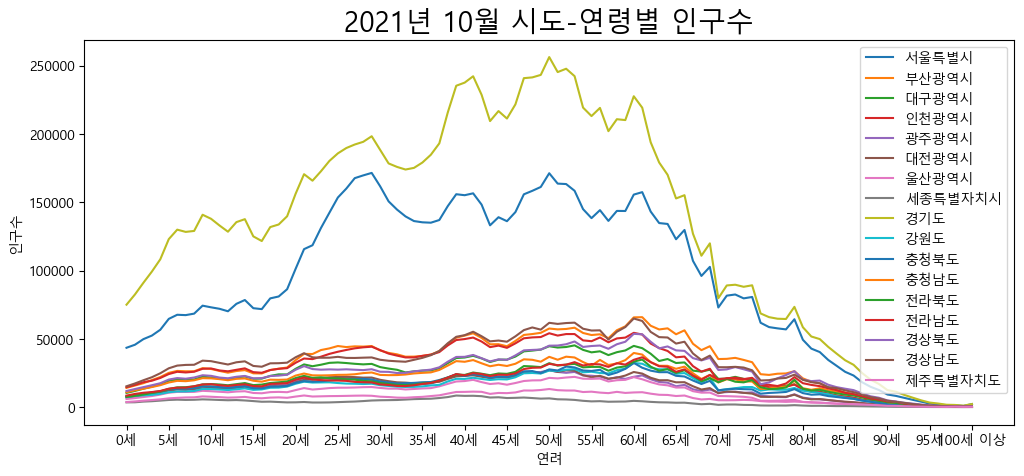

In [16]:
plt.rcParams['figure.figsize']=(12,5)
for i in range(len(df_sido)):
    plt.plot(df_sido.iloc[i], label = df_sido.index[i].split(' ')[0])
plt.legend()
plt.xticks(range(0,101,5))
plt.xlabel('연려')
plt.ylabel('인구수')
plt.title('2021년 10월 시도-연령별 인구수', size=20)
plt.show()

### 서브플롯

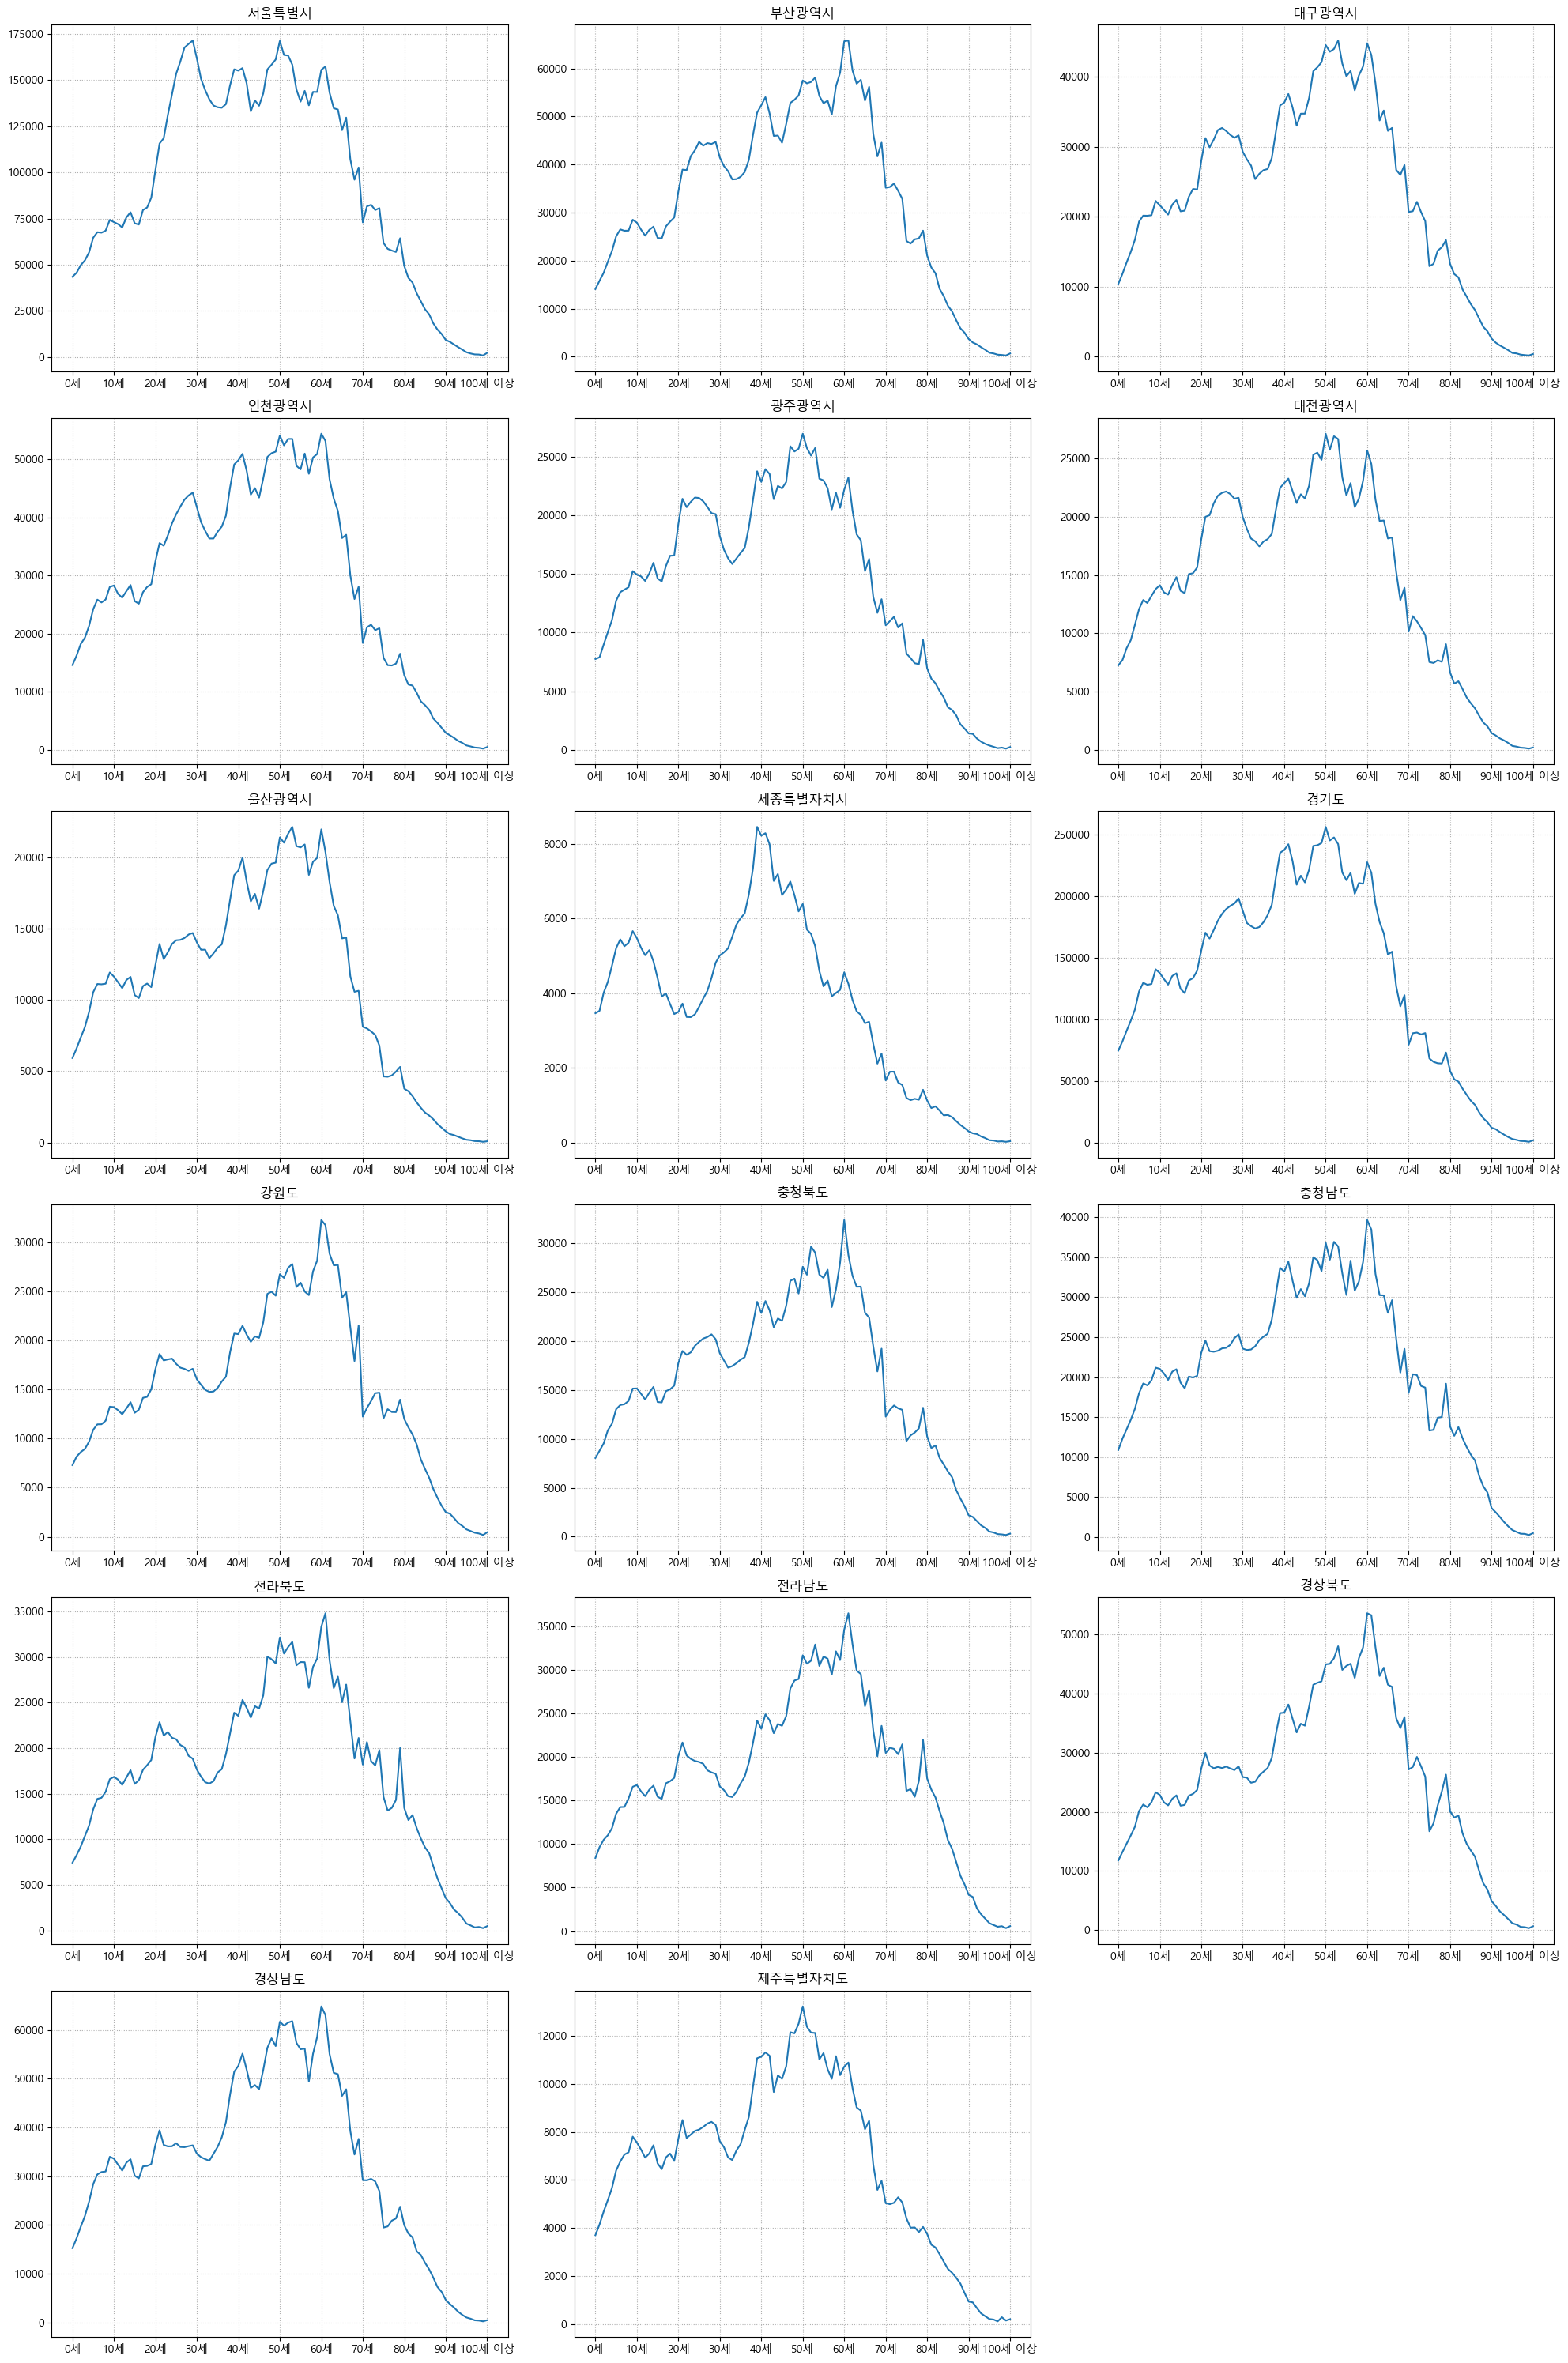

In [17]:
fig = plt.figure(figsize=(20,30))
for i in range(len(df_sido)):
    plt.subplot(6,3,i+1)
    plt.plot(df_sido.iloc[i])
    plt.xticks(range(0,101,10))
    plt.title(df_sido.index[i])
    plt.title(df_sido.index[i].split(' ')[0])
    plt.grid(ls=':')

fig.tight_layout()

## 서울시 구별 인구구조

In [18]:
df_seoul = df[df.index.str.find('구 (11')>0]

### 시각화

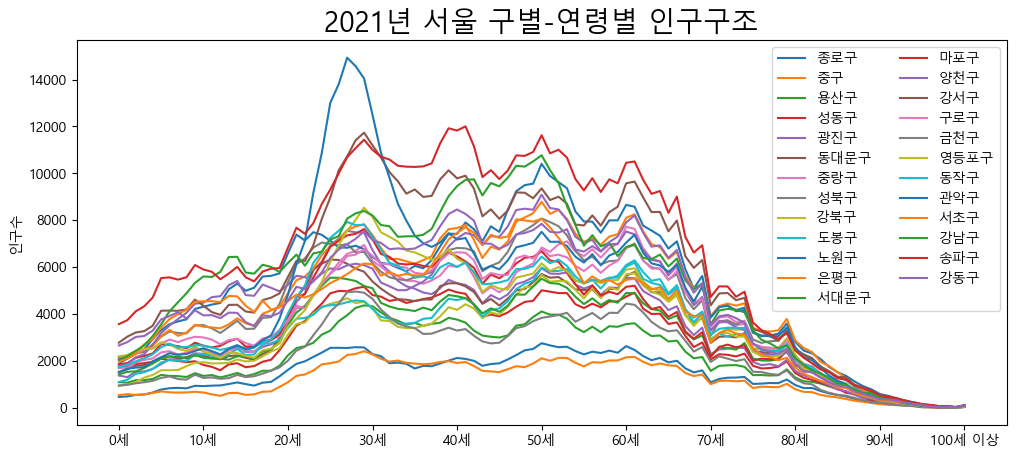

In [19]:
for i in range(len(df_seoul)):
    plt.plot(df_seoul.iloc[i], label=df_seoul.index[i].split(' ')[1])
plt.legend(ncol=2)
plt.xticks(range(0,101,10))
plt.title('2021년 서울 구별-연령별 인구구조', size=20)
plt.ylabel('인구수')
plt.show()

### 서브플롯

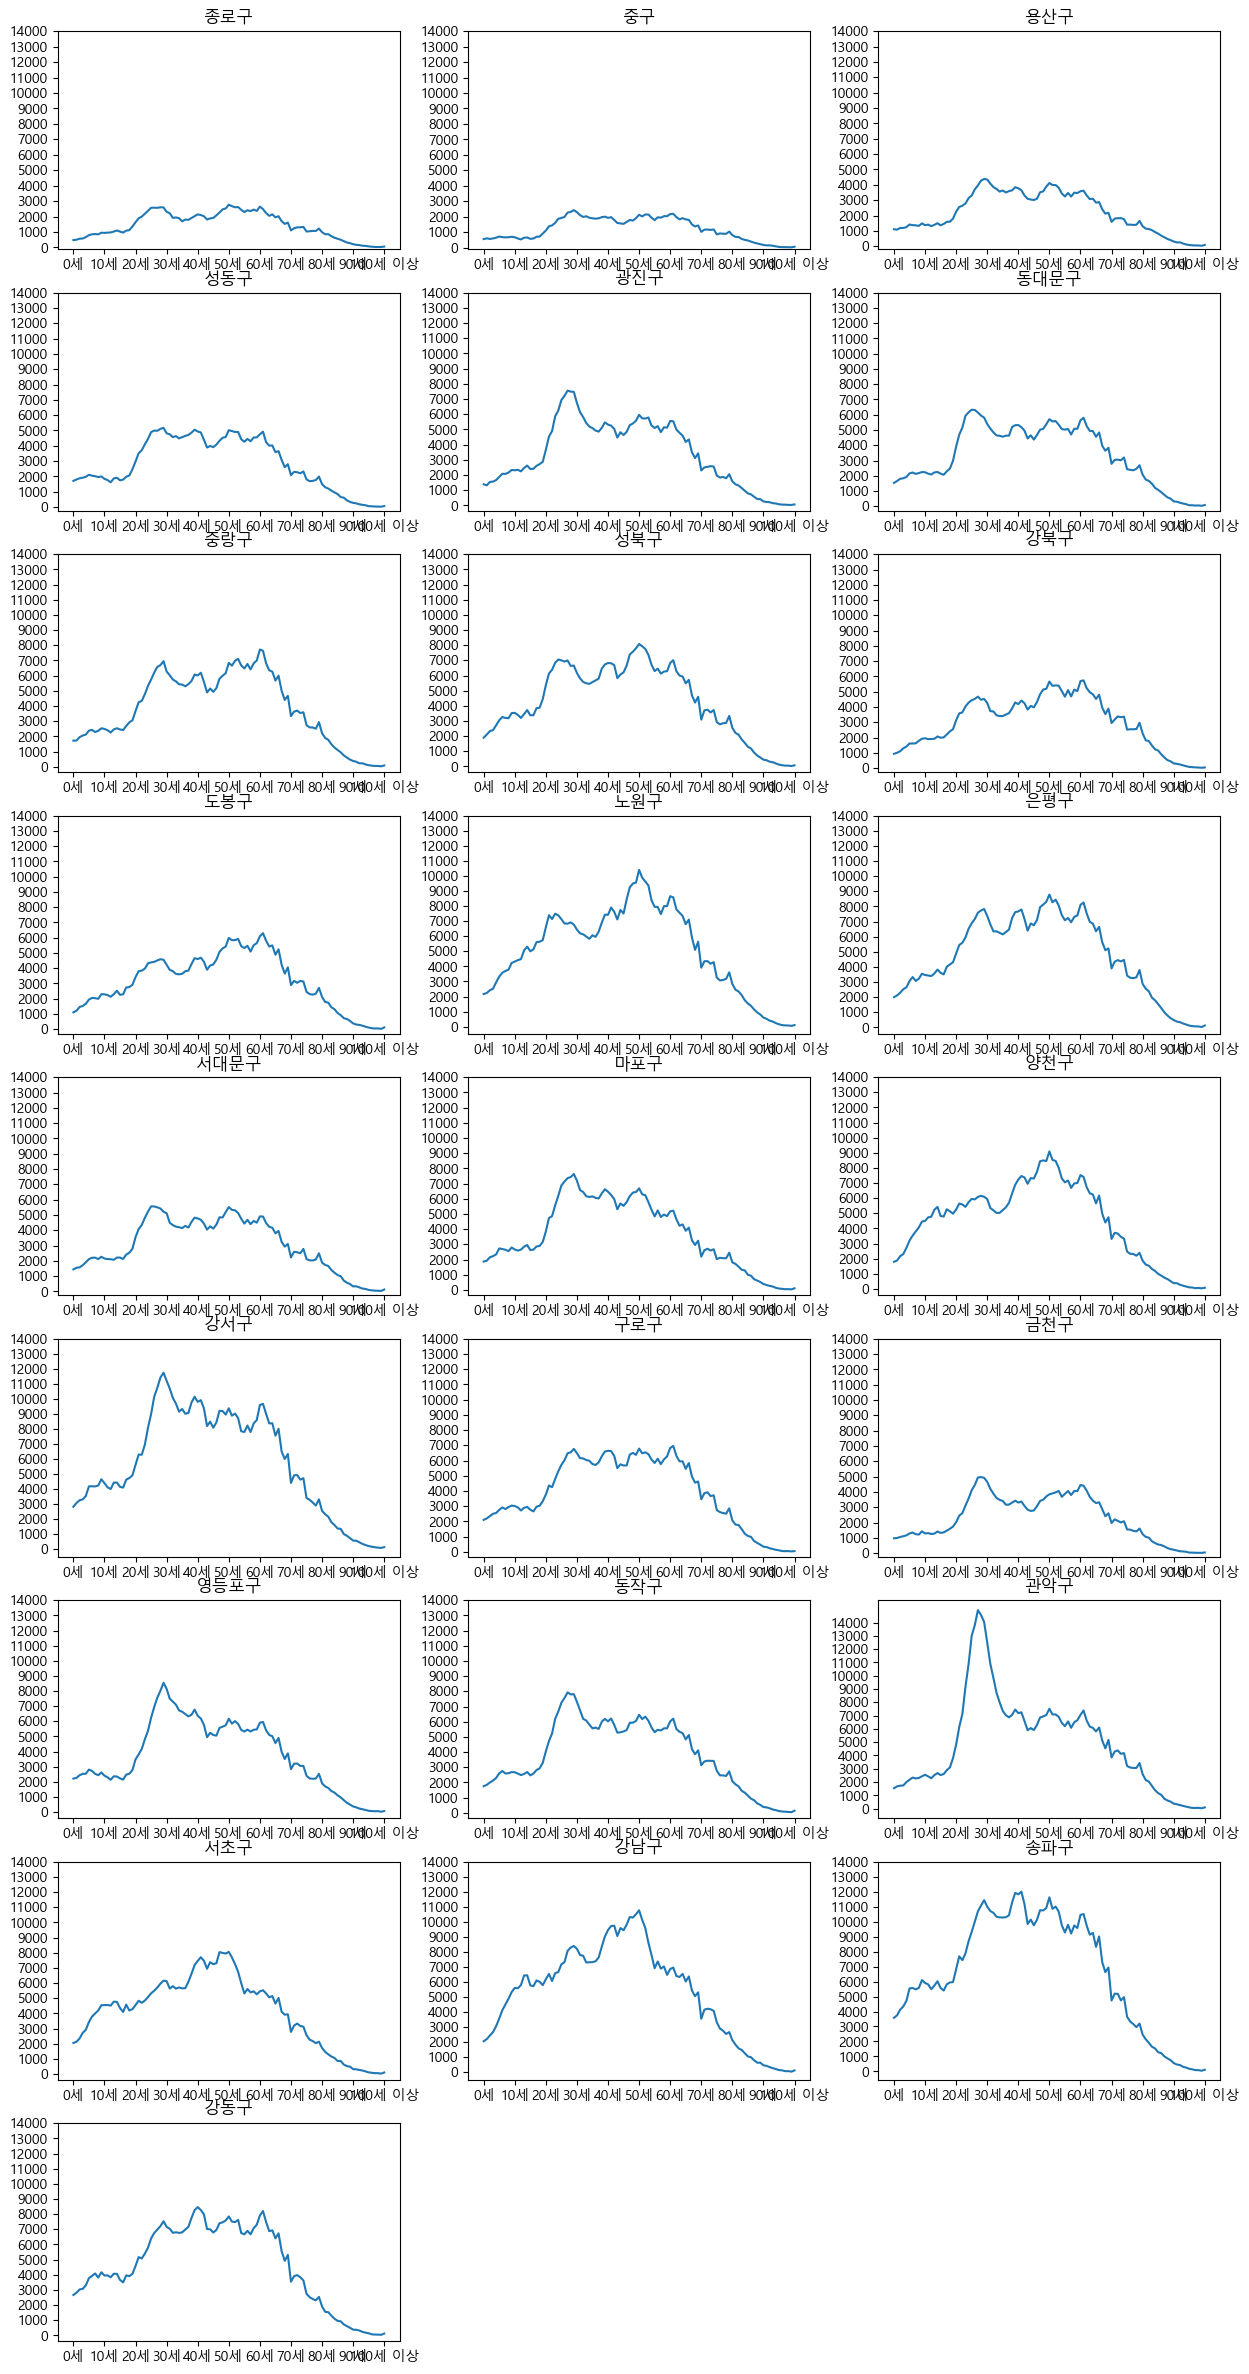

In [20]:
fig = plt.figure(figsize=(15,30))
for i in range(len(df_seoul)):
    ax = fig.add_subplot(9,3,i+1)
    ax.plot(df_seoul.iloc[i])
    ax.set_xticks(range(0,101,10))
    ax.set_yticks(range(0,15000,1000))
    ax.set_title(df_seoul.index[i].split(' ')[1])

## 특정 동 인구구조

### 학군지 인구구조

In [21]:
df_dong = df[(df.index.str.contains('강남구 대치')) | (df.index.str.contains('양천구 목'))].copy()
df_dong

0세   1세   2세   3세   4세   5세   6세   7세   8세   9세  \
행정구역                                                                           
서울특별시 양천구 목1동(1147051000)    95  111  136  183  209  293  373  403  482  485   
서울특별시 양천구 목2동(1147052000)   147  117  135  150  145  180  168  185  184  181   
서울특별시 양천구 목3동(1147053000)   121  134  116  125  155  119  150  116   94  118   
서울특별시 양천구 목4동(1147054000)    50   65   87   84  111  127  152  163  200  237   
서울특별시 양천구 목5동(1147055000)   112  111  140  195  242  320  416  488  543  637   
서울특별시 강남구 대치1동(1168060000)   39   43   63   93  115  166  223  272  357  380   
서울특별시 강남구 대치2동(1168061000)   79  101  109  142  170  159  238  284  318  379   
서울특별시 강남구 대치4동(1168063000)   41   49   48   48   52   67   75   92  102  102   

                            ...  91세  92세  93세  94세  95세  96세  97세  98세  99세  \
행정구역                        ...                                                
서울특별시 양천구 목1동(1147051000)   ...   22   18   11    9    5    4    2    7    0   
서울특별시 양천구 목2동(1147052000)   ...   25   14   13    9    3    4    1    6    0   
서울특별시 양천구 목3동(1147053000)   ...   16   16   13    6    5    3    1    4    2   
서울특별시 양천구 목4동(1147054000)   ...   23   12   12    4    2    3    2    2    2   
서울특별시 양천구 목5동(1147055000)   ...   27   25   19   21    9   12    3    4    1   
서울특별시 강남구 대치1동(1168060000)  ...   18   15    8    5    4    4    1    4    2   
서울특별시 강남구 대치2동(1168061000)  ...   16   19   13    7    8    6    1    2    3   
서울특별시 강남구 대치4동(1168063000)  ...   13    7    2    3    1    1    1    0    1   

                            100세 이상  
행정구역                                 
서울특별시 양천구 목1동(1147051000)         3  
서울특별시 양천구 목2동(1147052000)         2  
서울특별시 양천구 목3동(1147053000)         6  
서울특별시 양천구 목4동(1147054000)        12  
서울특별시 양천구 목5동(1147055000)         3  
서울특별시 강남구 대치1동(1168060000)        5  
서울특별시 강남구 대치2동(1168061000)        2  
서울특별시 강남구 대치4동(1168063000)        1  

[8 rows x 101 columns]

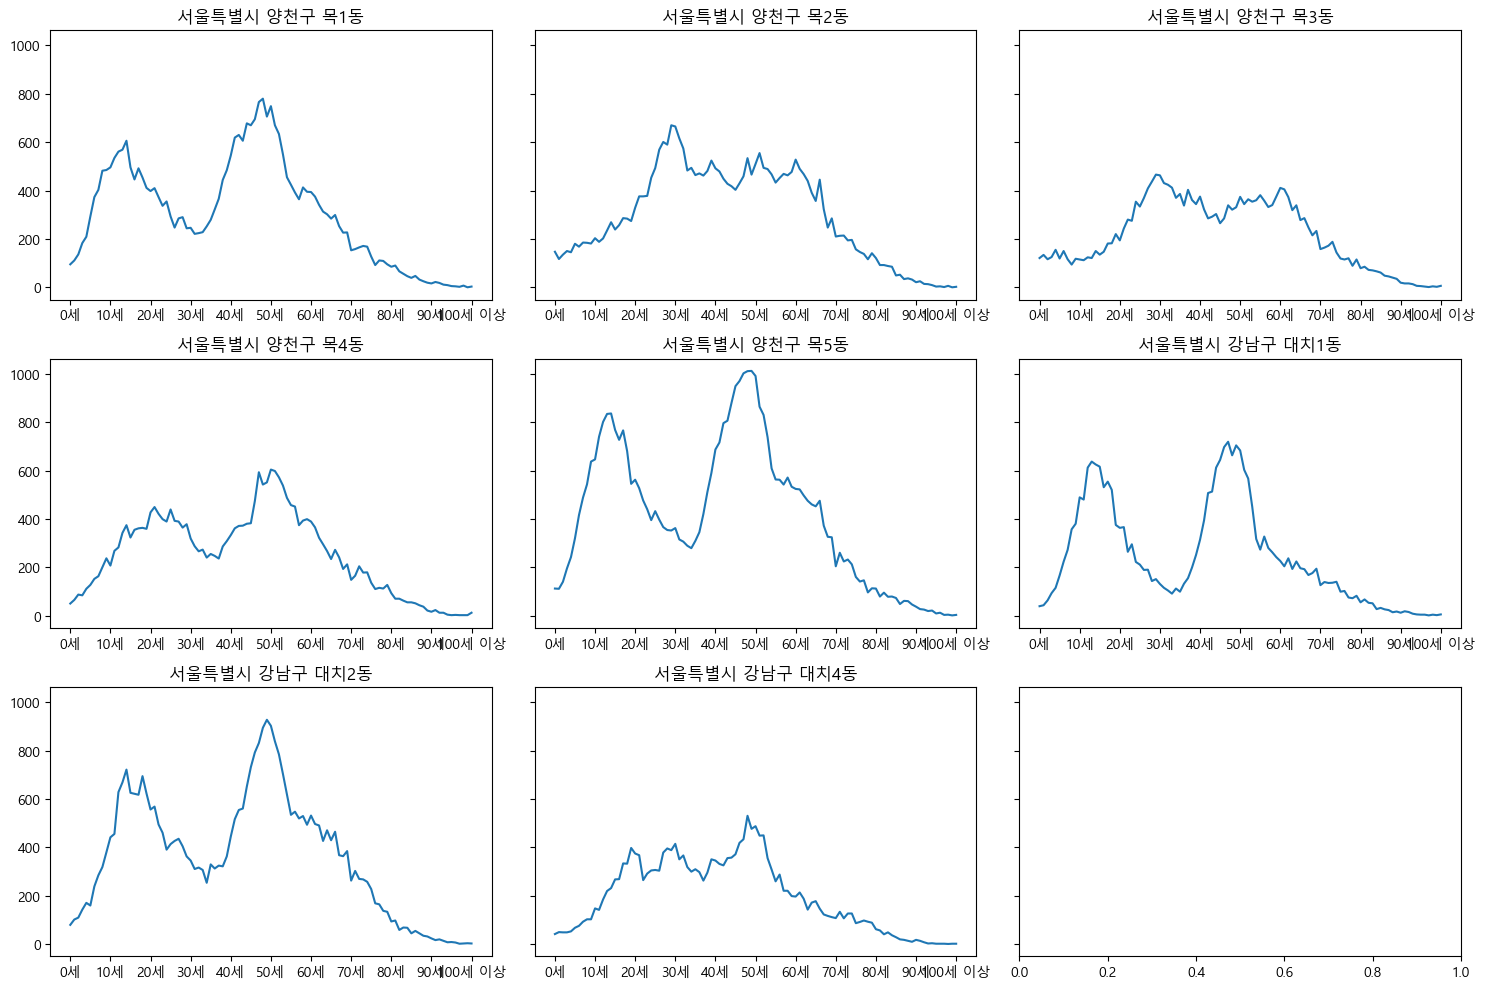

In [22]:
fig, ax = plt.subplots(3,3, figsize=(15,10), sharey=True)

# 서브플롯의 행번호 r 열번호 c
r,c = 0,0

for i in range(len(df_dong)):
    ax[r][c].plot(df_dong.iloc[i])
    ax[r][c].set_xticks(range(0,101,10))
    ax[r][c].set_title(df_dong.index[i].split('(')[0])
    
    c+=1
    if c%3 == 0:
        r+=1
        c=0
        
fig.tight_layout()
plt.show()

### 특정구의 동별 인구구조

In [23]:
df_dong2 = df[df.index.str.contains('관악구')]
df_dong2

0세    1세    2세    3세    4세    5세    6세    7세  \
행정구역                                                                         
서울특별시 관악구 (1162000000)      1540  1679  1728  1747  1999  2174  2341  2276   
서울특별시 관악구 보라매동(1162052500)    72    92    91   100   104   132   149   135   
서울특별시 관악구 청림동(1162054500)    122   116   114   110   130   143   127   104   
서울특별시 관악구 성현동(1162056500)    116   139   144   153   172   191   243   227   
서울특별시 관악구 행운동(1162057500)     85   106    82   109   102   119   117   114   
서울특별시 관악구 낙성대동(1162058500)    45    43    44    55    55    57    85    82   
서울특별시 관악구 청룡동(1162059500)     93   122   114   113   120   130   137   115   
서울특별시 관악구 은천동(1162060500)    153   134   164   153   182   201   220   224   
서울특별시 관악구 중앙동(1162061500)     32    26    40    32    41    41    44    48   
서울특별시 관악구 인헌동(1162062500)     82   104   103    89    93   103    94   111   
서울특별시 관악구 남현동(1162063000)     84    87    93    71   106    92   117   104   
서울특별시 관악구 서원동(1162064500)     60    73    58    50    66    66    64    55   
서울특별시 관악구 신원동(1162065500)     45    38    50    37    57    49    58    55   
서울특별시 관악구 서림동(1162066500)     63    56    58    67    81    73    93    82   
서울특별시 관악구 신사동(1162068500)     65    57    76    62    79    78    97    75   
서울특별시 관악구 신림동(1162069500)     44    33    46    24    34    44    32    34   
서울특별시 관악구 난향동(1162071500)     57    80    86    91   117   119   114   143   
서울특별시 관악구 조원동(1162072500)     42    67    43    45    61    75    69    68   
서울특별시 관악구 대학동(1162073500)     53    50    58    66    56    68    59    65   
서울특별시 관악구 삼성동(1162074500)     42    64    55    69    80    91    94   103   
서울특별시 관악구 미성동(1162076500)     99   105   115   148   148   179   190   202   
서울특별시 관악구 난곡동(1162077500)     86    87    94   103   115   123   138   130   

                              8세    9세  ...  91세  92세  93세  94세  95세  96세  \
행정구역                                    ...                                 
서울특별시 관악구 (1162000000)      2307  2438  ...  335  274  209  156   96   58   
서울특별시 관악구 보라매동(1162052500)   122   123  ...   19   17   12    9    8    3   
서울특별시 관악구 청림동(1162054500)    109   116  ...   18   15   11    3    5    1   
서울특별시 관악구 성현동(1162056500)    233   248  ...   36   21   10    7    6    3   
서울특별시 관악구 행운동(1162057500)    116   118  ...   20   15    8    6    4    2   
서울특별시 관악구 낙성대동(1162058500)    89    65  ...    4    9    6    0    3    1   
서울특별시 관악구 청룡동(1162059500)    119   128  ...   18   13    5   13    5    2   
서울특별시 관악구 은천동(1162060500)    235   258  ...   20   19   19   13    5    5   
서울특별시 관악구 중앙동(1162061500)     36    45  ...    9    4    3    3    1    3   
서울특별시 관악구 인헌동(1162062500)    118   125  ...   16    7    9    7    9    5   
서울특별시 관악구 남현동(1162063000)     89    85  ...    9    8    9    2    4    9   
서울특별시 관악구 서원동(1162064500)     85    66  ...    9   10    5    3    6    1   
서울특별시 관악구 신원동(1162065500)     76    54  ...   10   10   10    5    2    4   
서울특별시 관악구 서림동(1162066500)     78    83  ...   11   11   12    8    5    3   
서울특별시 관악구 신사동(1162068500)     84    88  ...   10    8    6   11    4    3   
서울특별시 관악구 신림동(1162069500)     23    25  ...    7    6    3    8    3    1   
서울특별시 관악구 난향동(1162071500)    135   157  ...   11    8    6    8    1    1   
서울특별시 관악구 조원동(1162072500)     65    80  ...   13    7   15    7    2    1   
서울특별시 관악구 대학동(1162073500)    100    80  ...   12   13    9    7    3    1   
서울특별시 관악구 삼성동(1162074500)     89   110  ...   37   33   21   18   10    3   
서울특별시 관악구 미성동(1162076500)    179   226  ...   25   22   14    7    4    2   
서울특별시 관악구 난곡동(1162077500)    127   158  ...   21   18   16   11    6    4   

                            97세  98세  99세  100세 이상  
행정구역                                                
서울특별시 관악구 (1162000000)       56   62   31       98  
서울특별시 관악구 보라매동(1162052500)    3    4    0        3  
서울특별시 관악구 청림동(1162054500)     1    0    2        3  
서울특별시 관악구 성현동(1162056500)     2    4    3  

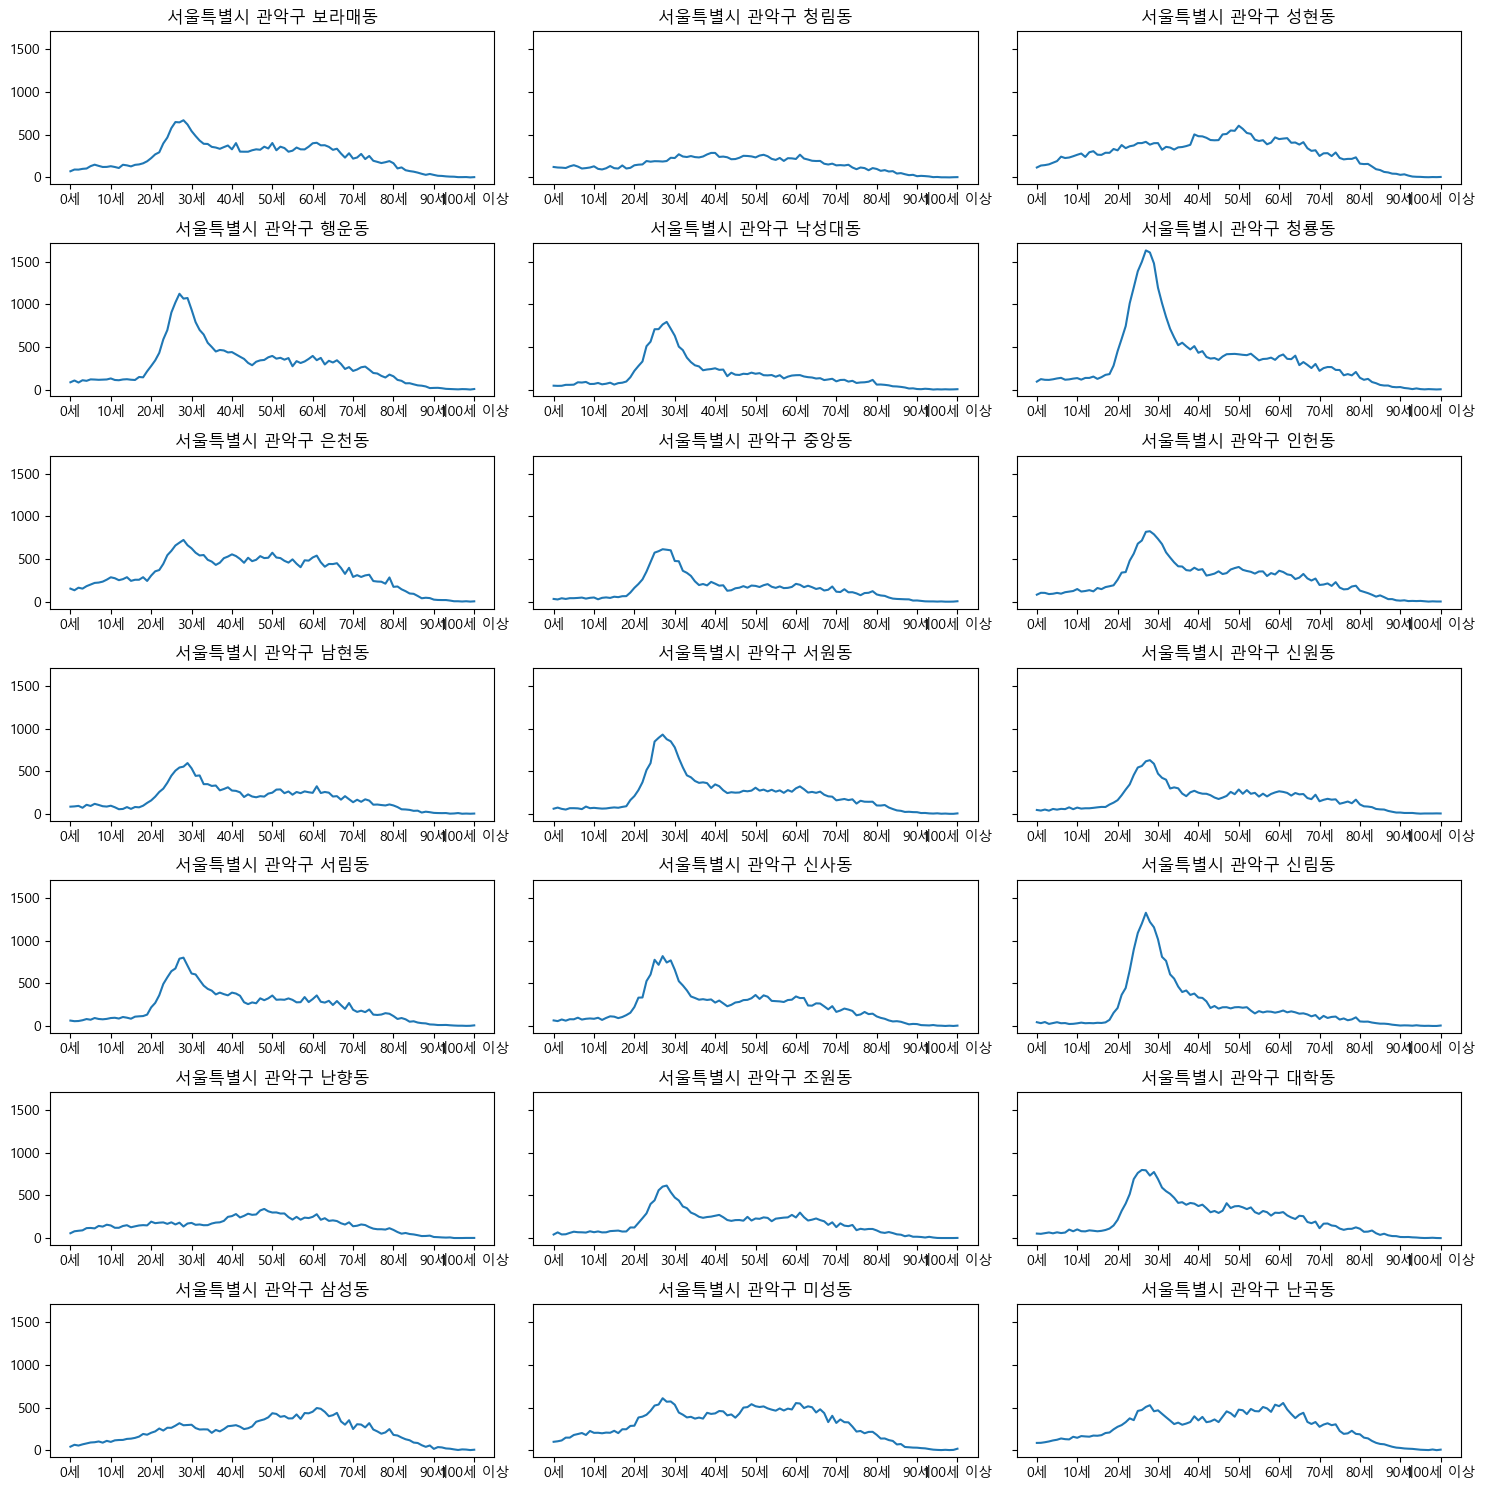

In [24]:
fig, ax = plt.subplots(7,3, figsize=(15,15), sharey=True)

# 서브플롯의 행번호 r 열번호 c
r,c = 0,0

for i in range(1, len(df_dong2)):
    ax[r][c].plot(df_dong2.iloc[i])
    ax[r][c].set_xticks(range(0,101,10))
    ax[r][c].set_title(df_dong2.index[i].split('(')[0])
    
    c+=1
    if c%3 == 0:
        r+=1
        c=0
        
fig.tight_layout()
plt.show()

# 아파트 실거래가 분석

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터 수집 및 전처리

## 데이터 수집
* 국토교통부 실거래가 공개시스템<br>
http://rtdown.molit.go.kr/

In [27]:
df = pd.read_csv('파이썬 데이터 시각화 데이터/data/아파트(매매)__실거래가_20211122131854.csv', encoding='cp949')
df

시군구    번지    본번  부번           단지명  전용면적(㎡)    계약년월  계약일  \
0       강원도 강릉시 견소동   202   202   0          송정한신   59.800  202108   12   
1       강원도 강릉시 견소동   202   202   0          송정한신   84.945  202108   28   
2       강원도 강릉시 견소동   202   202   0          송정한신   39.080  202108   28   
3       강원도 강릉시 견소동   289   289   0  송정해변신도브래뉴아파트   59.990  202108    5   
4       강원도 강릉시 견소동   289   289   0  송정해변신도브래뉴아파트   84.990  202108    9   
...             ...   ...   ...  ..           ...      ...     ...  ...   
56238  충청북도 충주시 호암동  1191  1191   0       호암힐데스하임   84.890  202108   24   
56239  충청북도 충주시 호암동  1191  1191   0       호암힐데스하임   99.800  202108   27   
56240  충청북도 충주시 호암동  1191  1191   0       호암힐데스하임   84.960  202108   27   
56241  충청북도 충주시 호암동  1191  1191   0       호암힐데스하임  120.490  202108   31   
56242  충청북도 충주시 호암동  1191  1191   0       호암힐데스하임   84.890  202108   31   

      거래금액(만원)  층  건축년도           도로명  해제사유발생일 거래유형 중개사소재지  
0       15,000  2  1997   경강로2539번길 8      NaN    -      -  
1       25,000  1  1997   경강로2539번길 8      NaN    -      -  
2       12,000  7  1997   경강로2539번길 8      NaN    -      -  
3       22,700  5  2005  경강로2539번길 22      NaN    -      -  
4       32,500  6  2005  경강로2539번길 22      NaN    -      -  
...        ... ..   ...           ...      ...  ...    ...  
56238   41,000  5  2019      호암토성2로 1      NaN    -      -  
56239   52,000  6  2019      호암토성2로 1      NaN    -      -  
56240   42,500  2  2019      호암토성2로 1      NaN    -      -  
56241   58,000  7  2019      호암토성2로 1      NaN    -      -  
56242   44,800  4  2019      호암토성2로 1      NaN    -      -  

[56243 rows x 15 columns]

## 데이터 전처리

In [28]:
# 해제 사유 발생일이 존재하는 데이터 삭제
df = df.drop(index = df[df['해제사유발생일'].notnull()].index)

In [29]:
df[df['해제사유발생일'].notnull()]

Empty DataFrame
Columns: [시군구, 번지, 본번, 부번, 단지명, 전용면적(㎡), 계약년월, 계약일, 거래금액(만원), 층, 건축년도, 도로명, 해제사유발생일, 거래유형, 중개사소재지]
Index: []

In [30]:
# 사용할 컬럼만 추출
df = df[['시군구','전용면적(㎡)','거래금액(만원)']]
df.head()

시군구  전용면적(㎡) 거래금액(만원)
0  강원도 강릉시 견소동   59.800   15,000
1  강원도 강릉시 견소동   84.945   25,000
2  강원도 강릉시 견소동   39.080   12,000
3  강원도 강릉시 견소동   59.990   22,700
4  강원도 강릉시 견소동   84.990   32,500

In [31]:
df.dtypes

시군구          object
전용면적(㎡)     float64
거래금액(만원)     object
dtype: object

In [32]:
# 전용면적 int 
df['전용면적(㎡)'] = df['전용면적(㎡)'].astype('int64')

In [33]:
# 거래금액 int
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',','').astype('int64')

In [34]:
df.dtypes

시군구         object
전용면적(㎡)      int64
거래금액(만원)     int64
dtype: object

## 시도별 아파트 매매가 데이터 추출

In [35]:
df['시도'] = df['시군구'].str.split(' ').str[0]

In [36]:
df

시군구  전용면적(㎡)  거래금액(만원)    시도
0       강원도 강릉시 견소동       59     15000   강원도
1       강원도 강릉시 견소동       84     25000   강원도
2       강원도 강릉시 견소동       39     12000   강원도
3       강원도 강릉시 견소동       59     22700   강원도
4       강원도 강릉시 견소동       84     32500   강원도
...             ...      ...       ...   ...
56238  충청북도 충주시 호암동       84     41000  충청북도
56239  충청북도 충주시 호암동       99     52000  충청북도
56240  충청북도 충주시 호암동       84     42500  충청북도
56241  충청북도 충주시 호암동      120     58000  충청북도
56242  충청북도 충주시 호암동       84     44800  충청북도

[54149 rows x 4 columns]

In [37]:
df['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [38]:
df['시도'].nunique()

17

In [39]:
df['전용면적(㎡)'].value_counts()

84     16709
59     13125
49      2256
39      1288
74      1016
       ...  
243        1
214        1
230        1
207        1
222        1
Name: 전용면적(㎡), Length: 213, dtype: int64

In [40]:
df_84 = df[df['전용면적(㎡)']==84].copy()
df_84

시군구  전용면적(㎡)  거래금액(만원)    시도
1       강원도 강릉시 견소동       84     25000   강원도
4       강원도 강릉시 견소동       84     32500   강원도
7       강원도 강릉시 견소동       84     31900   강원도
9        강원도 강릉시 교동       84     41000   강원도
14       강원도 강릉시 교동       84     37900   강원도
...             ...      ...       ...   ...
56236  충청북도 충주시 호암동       84     47700  충청북도
56237  충청북도 충주시 호암동       84     41800  충청북도
56238  충청북도 충주시 호암동       84     41000  충청북도
56240  충청북도 충주시 호암동       84     42500  충청북도
56242  충청북도 충주시 호암동       84     44800  충청북도

[16709 rows x 4 columns]

In [41]:
df_84_mean = df_84.groupby('시도')['거래금액(만원)'].mean()
df_84_mean

시도
강원도         25735.603214
경기도         57935.884750
경상남도        30821.486979
경상북도        25636.574724
광주광역시       38281.782713
대구광역시       39517.411444
대전광역시       45900.591398
부산광역시       43642.905830
서울특별시      121650.927757
세종특별자치시     71412.643678
울산광역시       36790.119760
인천광역시       52835.016497
전라남도        23643.111987
전라북도        26839.718367
제주특별자치도     43831.702128
충청남도        26264.903790
충청북도        28915.154827
Name: 거래금액(만원), dtype: float64

In [42]:
df_84_max = df_84.groupby('시도')['거래금액(만원)'].max()
df_84_max

시도
강원도         72500
경기도        220000
경상남도       109000
경상북도        64500
광주광역시      104500
대구광역시      148000
대전광역시      127000
부산광역시      183000
서울특별시      384500
세종특별자치시    119000
울산광역시      120000
인천광역시      130000
전라남도        74000
전라북도        66500
제주특별자치도     95000
충청남도        94500
충청북도        72000
Name: 거래금액(만원), dtype: int64

In [43]:
df_84_min = df_84.groupby('시도')['거래금액(만원)'].min()
df_84_min

시도
강원도         7000
경기도         7400
경상남도        5300
경상북도        4000
광주광역시      10700
대구광역시      13700
대전광역시      12500
부산광역시       9400
서울특별시      29500
세종특별자치시    23800
울산광역시       6900
인천광역시      16700
전라남도        6000
전라북도        4200
제주특별자치도    13500
충청남도        3500
충청북도        7600
Name: 거래금액(만원), dtype: int64

In [44]:
df_84_median = df_84.groupby('시도')['거래금액(만원)'].median()
df_84_median

시도
강원도         23700.0
경기도         52500.0
경상남도        28400.0
경상북도        25219.0
광주광역시       34000.0
대구광역시       35900.0
대전광역시       44435.0
부산광역시       38000.0
서울특별시      109000.0
세종특별자치시     74000.0
울산광역시       33000.0
인천광역시       47500.0
전라남도        23000.0
전라북도        22800.0
제주특별자치도     42750.0
충청남도        23700.0
충청북도        27000.0
Name: 거래금액(만원), dtype: float64

In [45]:
df_84_price = pd.concat([df_84_mean, df_84_max, df_84_min, df_84_median],axis = 1)
df_84_price

거래금액(만원)  거래금액(만원)  거래금액(만원)  거래금액(만원)
시도                                                  
강원도       25735.603214     72500      7000   23700.0
경기도       57935.884750    220000      7400   52500.0
경상남도      30821.486979    109000      5300   28400.0
경상북도      25636.574724     64500      4000   25219.0
광주광역시     38281.782713    104500     10700   34000.0
대구광역시     39517.411444    148000     13700   35900.0
대전광역시     45900.591398    127000     12500   44435.0
부산광역시     43642.905830    183000      9400   38000.0
서울특별시    121650.927757    384500     29500  109000.0
세종특별자치시   71412.643678    119000     23800   74000.0
울산광역시     36790.119760    120000      6900   33000.0
인천광역시     52835.016497    130000     16700   47500.0
전라남도      23643.111987     74000      6000   23000.0
전라북도      26839.718367     66500      4200   22800.0
제주특별자치도   43831.702128     95000     13500   42750.0
충청남도      26264.903790     94500      3500   23700.0
충청북도      28915.154827     72000      7600   27000.0

In [46]:
df_84_price.columns = ['평균','최대','최소','중간']

In [47]:
df_84_price.sort_values('평균', ascending=False)

평균      최대     최소        중간
시도                                             
서울특별시    121650.927757  384500  29500  109000.0
세종특별자치시   71412.643678  119000  23800   74000.0
경기도       57935.884750  220000   7400   52500.0
인천광역시     52835.016497  130000  16700   47500.0
대전광역시     45900.591398  127000  12500   44435.0
제주특별자치도   43831.702128   95000  13500   42750.0
부산광역시     43642.905830  183000   9400   38000.0
대구광역시     39517.411444  148000  13700   35900.0
광주광역시     38281.782713  104500  10700   34000.0
울산광역시     36790.119760  120000   6900   33000.0
경상남도      30821.486979  109000   5300   28400.0
충청북도      28915.154827   72000   7600   27000.0
전라북도      26839.718367   66500   4200   22800.0
충청남도      26264.903790   94500   3500   23700.0
강원도       25735.603214   72500   7000   23700.0
경상북도      25636.574724   64500   4000   25219.0
전라남도      23643.111987   74000   6000   23000.0

In [48]:
df_84_price['평균'] = round(df_84_price['평균'],1)
df_84_price

평균      최대     최소        중간
시도                                        
강원도       25735.6   72500   7000   23700.0
경기도       57935.9  220000   7400   52500.0
경상남도      30821.5  109000   5300   28400.0
경상북도      25636.6   64500   4000   25219.0
광주광역시     38281.8  104500  10700   34000.0
대구광역시     39517.4  148000  13700   35900.0
대전광역시     45900.6  127000  12500   44435.0
부산광역시     43642.9  183000   9400   38000.0
서울특별시    121650.9  384500  29500  109000.0
세종특별자치시   71412.6  119000  23800   74000.0
울산광역시     36790.1  120000   6900   33000.0
인천광역시     52835.0  130000  16700   47500.0
전라남도      23643.1   74000   6000   23000.0
전라북도      26839.7   66500   4200   22800.0
제주특별자치도   43831.7   95000  13500   42750.0
충청남도      26264.9   94500   3500   23700.0
충청북도      28915.2   72000   7600   27000.0

## 시도별 아파트 매매가 현황 시각화

In [50]:
import numpy as np
x_index = np.arange(1,len(df_84_price)+1)
x_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

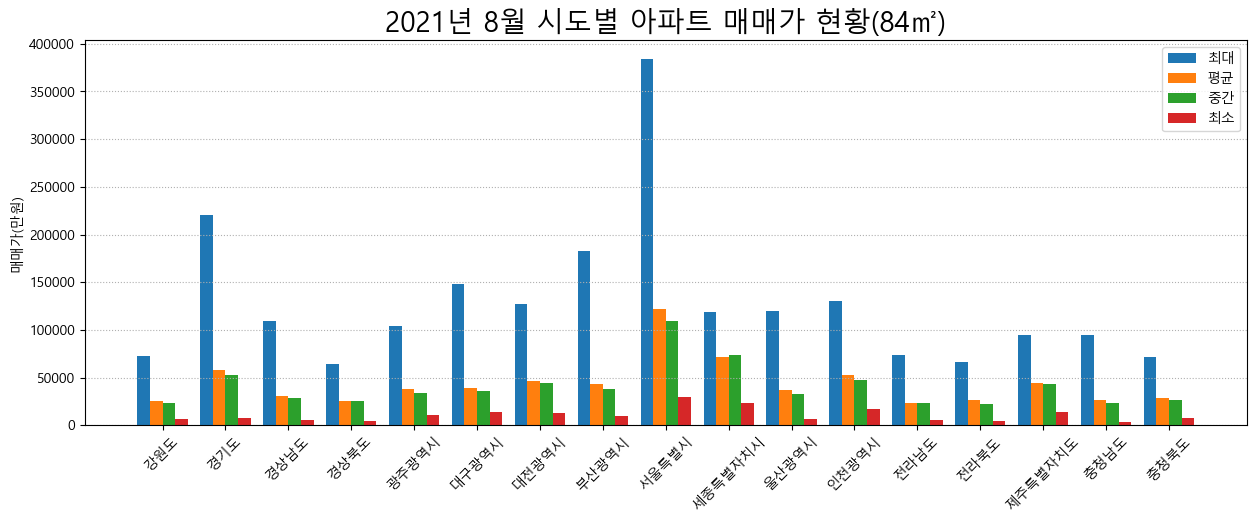

In [51]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(x_index-0.3, df_84_price['최대'], width=0.2, label='최대')
plt.bar(x_index-0.1, df_84_price['평균'], width=0.2, label='평균')
plt.bar(x_index+0.1, df_84_price['중간'], width=0.2, label='중간')
plt.bar(x_index+0.3, df_84_price['최소'], width=0.2, label='최소')
plt.legend()
plt.xticks(x_index, labels=df_84_price.index, rotation=45)
plt.grid(axis='y', ls=':')
plt.title('2021년 8월 시도별 아파트 매매가 현황(84㎡)', size=20)
plt.ylabel('매매가(만원)')
plt.show()


## 서울시 서브셋

In [52]:
df_84_seoul = df_84[df_84['시도']=='서울특별시'].copy()
df_84_seoul

시군구  전용면적(㎡)  거래금액(만원)     시도
35560  서울특별시 강남구 개포동       84    285000  서울특별시
35561  서울특별시 강남구 개포동       84    275000  서울특별시
35567  서울특별시 강남구 개포동       84    289000  서울특별시
35573  서울특별시 강남구 개포동       84    298000  서울특별시
35583  서울특별시 강남구 개포동       84     77000  서울특별시
...              ...      ...       ...    ...
39823  서울특별시 중랑구 신내동       84     75000  서울특별시
39824  서울특별시 중랑구 신내동       84     73500  서울특별시
39828  서울특별시 중랑구 중화동       84     90000  서울특별시
39833  서울특별시 중랑구 중화동       84     88000  서울특별시
39836  서울특별시 중랑구 중화동       84     88000  서울특별시

[1315 rows x 4 columns]

In [58]:
df_84_seoul['구'] = df_84_seoul['시군구'].str.split(' ').str[1]
df_84_seoul['구']

35560    강남구
35561    강남구
35567    강남구
35573    강남구
35583    강남구
        ... 
39823    중랑구
39824    중랑구
39828    중랑구
39833    중랑구
39836    중랑구
Name: 구, Length: 1315, dtype: object

In [59]:
df_84_seoul['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [60]:
df_84_seoul['구'].nunique()

25

### 박스 플롯 시각화

In [61]:
seoul_gu = df_84_seoul['구'].unique()
seoul_gu

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [69]:
df_seoul_gu = []
for i in range(len(seoul_gu)):
    df_seoul_gu.append(df_84_seoul.groupby('구')['거래금액(만원)'].get_group(seoul_gu[i]))

In [70]:
df_seoul_gu[2]

36099     94400
36100    107000
36101    115000
36102    113000
36104    106000
36106    103000
36110    104000
36111     88000
36113     73000
36114     80000
36116     77000
36122     82000
36123     80500
36124     83000
36125     81000
36126     85000
36129     85700
36131    105000
36138     79000
36142     82000
36144     84000
36148     83000
36149     80000
36150     83000
36151     82000
36156     58000
36161     60000
36163     64000
36167     67900
36169     83500
36170     78800
36171     62900
36172     62000
36173     60000
36178     68000
36179     74300
36181     59500
36183     57700
36184     60000
36185     61000
36186     64500
36187     65000
36206     74000
36207     73400
36208     67000
36209     55800
Name: 거래금액(만원), dtype: int64

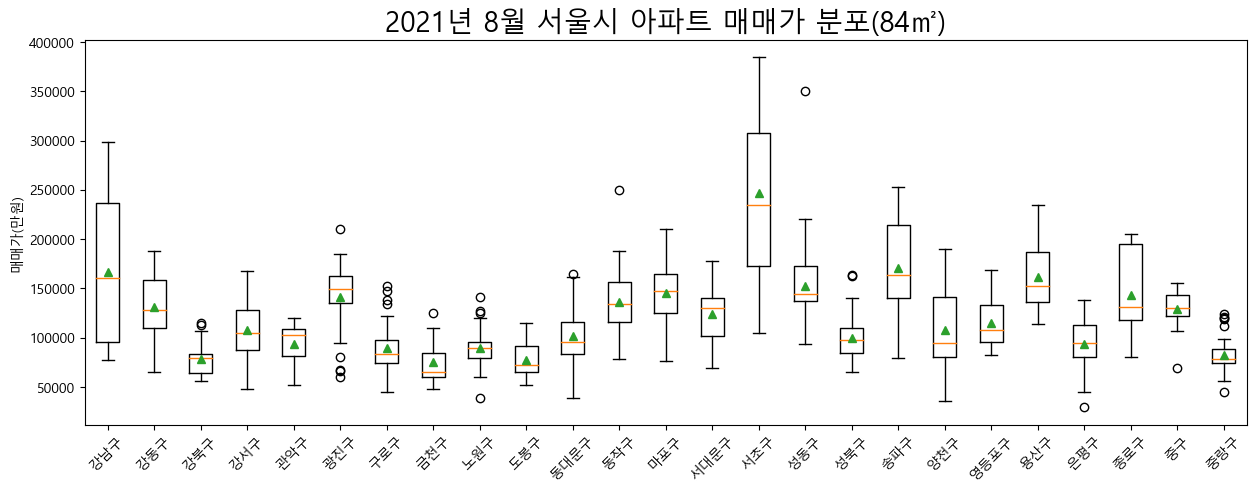

In [71]:
plt.boxplot(df_seoul_gu, labels=seoul_gu, showmeans=True)
plt.xticks(rotation=45)
plt.ylabel('매매가(만원)')
plt.title('2021년 8월 서울시 아파트 매매가 분포(84㎡)',size=20)
plt.show()

## 서울시 아파트 구별 평균 매매가, 거래건수

In [76]:
# 서울시 아파트 구별 평균 매매가
df_84_seoul_mean = df_84_seoul.groupby('구')['거래금액(만원)'].mean()
df_84_seoul_mean = round(df_84_seoul_mean,1)
df_84_seoul_mean

구
강남구     166324.5
강동구     130831.1
강북구      78541.3
강서구     107935.7
관악구      94022.2
광진구     141525.0
구로구      89275.4
금천구      75415.4
노원구      89126.3
도봉구      77755.1
동대문구    102024.5
동작구     136100.0
마포구     145163.1
서대문구    124358.7
서초구     246792.5
성동구     152622.2
성북구      99480.3
송파구     171039.4
양천구     107729.2
영등포구    115432.1
용산구     161473.7
은평구      94170.7
종로구     143280.0
중구      129078.6
중랑구      82726.4
Name: 거래금액(만원), dtype: float64

In [78]:
# 서울시 아파트 구별 거래건수
df_84_seoul_count = df_84_seoul.groupby('구')['거래금액(만원)'].count()
df_84_seoul_count.sort_values()

구
종로구      12
중구       14
용산구      19
금천구      26
광진구      32
관악구      36
서초구      40
강북구      46
양천구      48
도봉구      49
동대문구     49
서대문구     52
중랑구      53
영등포구     53
구로구      57
노원구      57
은평구      58
마포구      61
강동구      61
동작구      63
송파구      71
성동구      72
강남구      84
강서구      98
성북구     104
Name: 거래금액(만원), dtype: int64

In [82]:
df_84_seoul_mean_count = pd.concat([df_84_seoul_mean, df_84_seoul_count], axis=1)
df_84_seoul_mean_count

거래금액(만원)  거래금액(만원)
구                       
강남구   166324.5        84
강동구   130831.1        61
강북구    78541.3        46
강서구   107935.7        98
관악구    94022.2        36
광진구   141525.0        32
구로구    89275.4        57
금천구    75415.4        26
노원구    89126.3        57
도봉구    77755.1        49
동대문구  102024.5        49
동작구   136100.0        63
마포구   145163.1        61
서대문구  124358.7        52
서초구   246792.5        40
성동구   152622.2        72
성북구    99480.3       104
송파구   171039.4        71
양천구   107729.2        48
영등포구  115432.1        53
용산구   161473.7        19
은평구    94170.7        58
종로구   143280.0        12
중구    129078.6        14
중랑구    82726.4        53

In [86]:
df_84_seoul_mean_count.columns = ['평균매매가(만원)', '거래건수']
df_84_seoul_mean_count = df_84_seoul_mean_count.sort_values('평균매매가(만원)', ascending = False)
df_84_seoul_mean_count

평균매매가(만원)  거래건수
구                    
서초구    246792.5    40
송파구    171039.4    71
강남구    166324.5    84
용산구    161473.7    19
성동구    152622.2    72
마포구    145163.1    61
종로구    143280.0    12
광진구    141525.0    32
동작구    136100.0    63
강동구    130831.1    61
중구     129078.6    14
서대문구   124358.7    52
영등포구   115432.1    53
강서구    107935.7    98
양천구    107729.2    48
동대문구   102024.5    49
성북구     99480.3   104
은평구     94170.7    58
관악구     94022.2    36
구로구     89275.4    57
노원구     89126.3    57
중랑구     82726.4    53
강북구     78541.3    46
도봉구     77755.1    49
금천구     75415.4    26

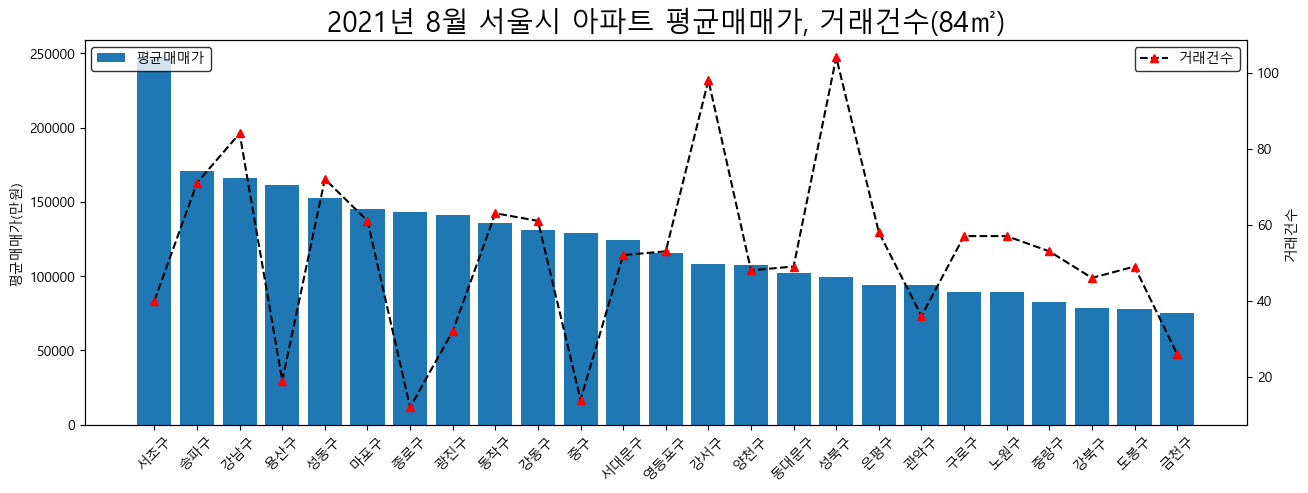

In [102]:
fig, ax1 = plt.subplots()
ax1.bar(df_84_seoul_mean_count.index, df_84_seoul_mean_count['평균매매가(만원)'], label = '평균매매가')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(df_84_seoul_mean_count['거래건수'], 'k^--', mfc='r', mec='r', label = '거래건수')

ax1.legend(loc='upper left', edgecolor = 'k')
ax2.legend(loc='upper right', edgecolor = 'k')

ax1.set_ylabel('평균매매가(만원)')
ax2.set_ylabel('거래건수')
plt.title('2021년 8월 서울시 아파트 평균매매가, 거래건수(84㎡)', size=20)
plt.show()

# 상가(상권)정보 분석, 시각화

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

## 데이터 수집
* 상가상권정보<br>
https://www.data.go.kr/data/15083033/fileData.do

## 데이터프레임 생성
* 17개 파일의 데이터를 각각 데이터프레임으로 만든 후 합친다.

### 17개의 파일을 각각 데이터프레임으로 만들기
* column에 NaN값이나 여러 type의 데이터가 섞여 있으면 DtypeWarning 발생<br>
dtype option으로 타입을 명시해주거나 low_memory = False로 지정해 주면 경고 메시지가 출력되지 않는다.

In [105]:
df1 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_강원_202109.csv')

In [106]:
df2 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_경기_202109.csv')

In [107]:
df3 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_경남_202109.csv')

In [108]:
df4 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_경북_202109.csv', low_memory=False)

In [109]:
df5 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_광주_202109.csv', low_memory=False)

In [110]:
df6 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_대구_202109.csv', low_memory=False)

In [111]:
df7 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_대전_202109.csv')

In [112]:
df8 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_부산_202109.csv')

In [113]:
df9 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_서울_202109.csv')

In [114]:
df10 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_세종_202109.csv')

In [115]:
df11 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_울산_202109.csv')

C:\Users\twas0\AppData\Local\Temp\ipykernel_7652\3458313669.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df11 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_울산_202109.csv')


In [116]:
df12 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_인천_202109.csv')

In [117]:
df13 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_전남_202109.csv')   

C:\Users\twas0\AppData\Local\Temp\ipykernel_7652\476267899.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df13 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_전남_202109.csv')


In [118]:
df14 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_전북_202109.csv')

C:\Users\twas0\AppData\Local\Temp\ipykernel_7652\245036293.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df14 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_전북_202109.csv')


In [119]:
df15 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_제주_202109.csv')

C:\Users\twas0\AppData\Local\Temp\ipykernel_7652\71724633.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df15 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_제주_202109.csv')


In [120]:
df16 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_충남_202109.csv')

C:\Users\twas0\AppData\Local\Temp\ipykernel_7652\3288532430.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df16 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_충남_202109.csv')


In [121]:
df17 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_충북_202109.csv')  

C:\Users\twas0\AppData\Local\Temp\ipykernel_7652\2210856148.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df17 = pd.read_csv('파이썬 데이터 시각화 데이터/data/소상공인시장진흥공단_상가(상권)정보_충북_202109.csv')


In [125]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17], ignore_index = True)

In [127]:
len(df.columns)

39

In [128]:
# 컬럼갯수 최대 지정
pd.options.display.max_columns=39

In [129]:
df.head()

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
0  25033300      동그라미중고타이어  NaN         D       소매       D23  자동차/자동차용품   
1  17174549  세인트존스호텔Ohcrab  NaN         O       숙박       O01      호텔/콘도   
2  17174079        평창라마다호텔  NaN         O       숙박       O01      호텔/콘도   
3  17173904    호텔탑스텐스카이라운지  NaN         O       숙박       O01      호텔/콘도   
4  17175299          족발야시장  NaN         Q       음식       Q01         한식   

  상권업종소분류코드 상권업종소분류명 표준산업분류코드           표준산업분류명  시도코드  시도명  시군구코드 시군구명  \
0    D23A04    타이어판매   G45211  자동차 타이어 및 튜브 판매업    42  강원도  42150  강릉시   
1    O01A01    호텔/콘도      NaN               NaN    42  강원도  42150  강릉시   
2    O01A01    호텔/콘도      NaN               NaN    42  강원도  42760  평창군   
3    O01A01    호텔/콘도      NaN               NaN    42  강원도  42150  강릉시   
4    Q01A08  족발/보쌈전문   I56111           한식 음식점업    42  강원도  42150  강릉시   

        행정동코드  행정동명         법정동코드  법정동명                 지번코드  대지구분코드 대지구분명  \
0  4215057100  포남1동  4.215011e+09   포남동  4215011100110960006       1    대지   
1  4215058000   초당동  4.215011e+09   강문동  4215011300100010001       1    대지   
2  4276038000  대관령면  4.276038e+09  대관령면  4276038024102450066       1    대지   
3  4215035000   옥계면  4.215035e+09   옥계면  4215035029100920001       1    대지   
4  4215055000   교1동  4.215011e+09    교동  4215011000118650014       1    대지   

   지번본번지  지번부번지                     지번주소         도로명코드               도로명  \
0   1096    6.0       강원도 강릉시 포남동 1096-6  4.215032e+11       강원도 강릉시 가작로   
1      1    1.0          강원도 강릉시 강문동 1-1  4.215032e+11       강원도 강릉시 창해로   
2    245   66.0  강원도 평창군 대관령면 횡계리 245-66  4.276045e+11  강원도 평창군 대관령면 오목길   
3     92    1.0     강원도 강릉시 옥계면 금진리 92-1  4.215032e+11   강원도 강릉시 옥계면 헌화로   
4   1865   14.0       강원도 강릉시 교동 1865-14  4.215045e+11     강원도 강릉시 율곡초교길   

   건물본번지  건물부번지                     건물관리번호      건물명                   도로명주소  \
0    270    NaN  4215011100110960006010791      NaN         강원도 강릉시 가작로 270   
1    307    NaN  4215011300100010001017124  세인트존스호텔         강원도 강릉시 창해로 307   
2    107    NaN  4276038024102450036000001      NaN    강원도 평창군 대관령면 오목길 107   
3    455   34.0  4215035029100920001000002      NaN  강원도 강릉시 옥계면 헌화로 455-34   
4     41    NaN  4215011000118650014003453      NaN        강원도 강릉시 율곡초교길 41   

      구우편번호    신우편번호  동정보  층정보  호정보          경도         위도  
0  210110.0  25488.0    1  NaN  NaN  128.904472  37.770252  
1  210120.0  25467.0  NaN  NaN  NaN  128.920908  37.791299  
2  232954.0  25342.0  NaN  NaN  NaN  128.717971  37.660051  
3  210831.0  25633.0  NaN  NaN  NaN  129.052902  37.654680  
4  210924.0  25513.0  NaN  NaN  NaN  128.878636  37.765339

## 데이터 전처리

In [132]:
df.shape

(2245938, 39)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245938 entries, 0 to 2245937
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      float64
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      float64
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 

In [134]:
# 서브셋 만들기
df.head(1)

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명 상권업종소분류코드  \
0  25033300  동그라미중고타이어  NaN         D       소매       D23  자동차/자동차용품    D23A04   

  상권업종소분류명 표준산업분류코드           표준산업분류명  시도코드  시도명  시군구코드 시군구명       행정동코드  \
0    타이어판매   G45211  자동차 타이어 및 튜브 판매업    42  강원도  42150  강릉시  4215057100   

   행정동명         법정동코드 법정동명                 지번코드  대지구분코드 대지구분명  지번본번지  지번부번지  \
0  포남1동  4.215011e+09  포남동  4215011100110960006       1    대지   1096    6.0   

                 지번주소         도로명코드          도로명  건물본번지  건물부번지  \
0  강원도 강릉시 포남동 1096-6  4.215032e+11  강원도 강릉시 가작로    270    NaN   

                      건물관리번호  건물명            도로명주소     구우편번호    신우편번호 동정보  \
0  4215011100110960006010791  NaN  강원도 강릉시 가작로 270  210110.0  25488.0   1   

   층정보  호정보          경도         위도  
0  NaN  NaN  128.904472  37.770252

In [136]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [137]:
df_store = df[['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명','시군구명','행정동명','법정동명','경도','위도']].copy()

In [138]:
df_store

상호명 상권업종대분류명   상권업종중분류명  상권업종소분류명   시도명     시군구명  \
0            동그라미중고타이어       소매  자동차/자동차용품     타이어판매   강원도      강릉시   
1        세인트존스호텔Ohcrab       숙박      호텔/콘도     호텔/콘도   강원도      강릉시   
2              평창라마다호텔       숙박      호텔/콘도     호텔/콘도   강원도      평창군   
3          호텔탑스텐스카이라운지       숙박      호텔/콘도     호텔/콘도   강원도      강릉시   
4                족발야시장       음식         한식   족발/보쌈전문   강원도      강릉시   
...                ...      ...        ...       ...   ...      ...   
2245933       스카이미술교습소    학문/교육  학원-음악미술무용  서예/서화/미술  충청북도      진천군   
2245934           시티창호    생활서비스       주택수리      유리창호  충청북도      음성군   
2245935           타이타닉    생활서비스    이/미용/건강   비만/피부관리  충청북도  청주시 청원구   
2245936           브릭헤어    생활서비스    이/미용/건강     여성미용실  충청북도  청주시 서원구   
2245937     싸이코참치기업도시점       음식     일식/수산물     참치전문점  충청북도      충주시   

              행정동명  법정동명          경도         위도  
0             포남1동   포남동  128.904472  37.770252  
1              초당동   강문동  128.920908  37.791299  
2             대관령면  대관령면  128.717971  37.660051  
3              옥계면   옥계면  129.052902  37.654680  
4              교1동    교동  128.878636  37.765339  
...            ...   ...         ...        ...  
2245933        덕산읍   덕산읍  127.527967  36.902562  
2245934        금왕읍   금왕읍  127.527023  37.011734  
2245935       오근장동   주성동  127.497228  36.671633  
2245936  성화.개신.죽림동   성화동  127.456752  36.617518  
2245937       중앙탑면  중앙탑면  127.824401  37.017746  

[2245938 rows x 10 columns]

In [139]:
df_store.shape

(2245938, 10)

In [141]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245938 entries, 0 to 2245937
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상호명       object 
 1   상권업종대분류명  object 
 2   상권업종중분류명  object 
 3   상권업종소분류명  object 
 4   시도명       object 
 5   시군구명      object 
 6   행정동명      object 
 7   법정동명      object 
 8   경도        float64
 9   위도        float64
dtypes: float64(2), object(8)
memory usage: 171.4+ MB


In [143]:
df_store.isnull().sum()

상호명             2
상권업종대분류명        0
상권업종중분류명        0
상권업종소분류명        0
시도명             0
시군구명            0
행정동명        11839
법정동명         1453
경도              0
위도              0
dtype: int64

In [144]:
df_store['상권업종대분류명'].unique()

array(['소매', '숙박', '음식', '학문/교육', '생활서비스', '부동산', '관광/여가/오락', '스포츠'],
      dtype=object)

In [145]:
df_store['상권업종대분류명'].nunique()

8

## 상권업종분류표

In [148]:
df_store_class = df_store[['상권업종대분류명','상권업종중분류명','상권업종소분류명']].drop_duplicates().sort_values(['상권업종대분류명','상권업종중분류명','상권업종소분류명'])
df_store_class

상권업종대분류명      상권업종중분류명 상권업종소분류명
8094    관광/여가/오락  PC/오락/당구/볼링등       기원
2885    관광/여가/오락  PC/오락/당구/볼링등      당구장
4683    관광/여가/오락  PC/오락/당구/볼링등      볼링장
44597   관광/여가/오락  PC/오락/당구/볼링등   비디오감상실
53746   관광/여가/오락  PC/오락/당구/볼링등   오락용사격장
...          ...           ...      ...
140419     학문/교육          학원기타    학원-모델
101249     학문/교육          학원기타  학원-실내운전
11474      학문/교육          학원기타  학원-심리변론
162249     학문/교육          학원기타    학원-역학
115129     학문/교육          학원기타    학원-침술

[716 rows x 3 columns]

In [149]:
pd.options.display.max_rows=716
df_store_class

상권업종대분류명       상권업종중분류명       상권업종소분류명
8094     관광/여가/오락   PC/오락/당구/볼링등             기원
2885     관광/여가/오락   PC/오락/당구/볼링등            당구장
4683     관광/여가/오락   PC/오락/당구/볼링등            볼링장
44597    관광/여가/오락   PC/오락/당구/볼링등         비디오감상실
53746    관광/여가/오락   PC/오락/당구/볼링등         오락용사격장
315      관광/여가/오락   PC/오락/당구/볼링등         인터넷PC방
14125    관광/여가/오락   PC/오락/당구/볼링등          전자오락실
741      관광/여가/오락   PC/오락/당구/볼링등            탁구장
505082   관광/여가/오락   PC/오락/당구/볼링등           포켓볼장
1751     관광/여가/오락     경마/경륜/성인오락            게임룸
103      관광/여가/오락       놀이/여가/취미       기타오락관련산업
223      관광/여가/오락       놀이/여가/취미            낚시터
8965     관광/여가/오락       놀이/여가/취미           주말농장
64337    관광/여가/오락       무도/유흥/가무        극장식유흥주점
333      관광/여가/오락       무도/유흥/가무          나이트클럽
64       관광/여가/오락       무도/유흥/가무            노래방
2188     관광/여가/오락       무도/유흥/가무      무도유흥주점-종합
178      관광/여가/오락       무도/유흥/가무            무도장
66228    관광/여가/오락       무도/유흥/가무        한국식유흥주점
104533   관광/여가/오락         스포츠/운동        롤러스케이트장
1754     관광/여가/오락         스포츠/운동        서바이벌게임장
42732    관광/여가/오락         스포츠/운동          스케이트장
37735    관광/여가/오락         스포츠/운동           실내낚시
281294   관광/여가/오락         스포츠/운동          실내사격장
96147    관광/여가/오락         스포츠/운동        실내스케이트장
31968    관광/여가/오락         스포츠/운동        실내야구연습장
270023   관광/여가/오락         스포츠/운동        실외야구연습장
7546     관광/여가/오락       연극/영화/극장   연극/음악/예술관련기타
61741    관광/여가/오락       연극/영화/극장           음악감상
8568     관광/여가/오락      요가/단전/마사지            단식원
31       관광/여가/오락      요가/단전/마사지           단전호흡
213      관광/여가/오락      요가/단전/마사지         스포츠마사지
256      관광/여가/오락      요가/단전/마사지          안마시술소
3740     관광/여가/오락      요가/단전/마사지          요가/단식
202      관광/여가/오락      요가/단전/마사지            지압원
33149    관광/여가/오락      요가/단전/마사지          체형미교실
390890   관광/여가/오락      요가/단전/마사지            활기원
34561         부동산       부동산관련서비스          부동산신탁
23            부동산          부동산중개          부동산중개
326           부동산             분양        건물분양-종합
83551         부동산             분양          사무실분양
21768         부동산             분양           상가분양
3659          부동산             분양           주택공급
8738          부동산       평가/개발/관리        부동산감정평가
37131         부동산       평가/개발/관리       부동산소유권조사
6192          부동산       평가/개발/관리          부동산자문
3758        생활서비스      개인/가정용품수리           가구수리
3924        생활서비스      개인/가정용품수리         가방구두수전
116         생활서비스      개인/가정용품수리         가전제품수리
67564       생활서비스      개인/가정용품수리        가죽/모피수선
25          생활서비스      개인/가정용품수리   개인/가정용품수리-종합
251907      생활서비스      개인/가정용품수리          골동품수리
84323       생활서비스      개인/가정용품수리           금고수리
4221        생활서비스      개인/가정용품수리          농기구수리
17142       생활서비스      개인/가정용품수리           악기수선
42717       생활서비스      개인/가정용품수리         액세서리수선
837         생활서비스      개인/가정용품수리       에어컨수리/설치
3604        생활서비스      개인/가정용품수리           열쇠제작
557         생활서비스      개인/가정용품수리            옷수선
4456        생활서비스      개인/가정용품수리       정보통신기기수리
40          생활서비스      개인/가정용품수리          컴퓨터수리
59138       생활서비스      개인/가정용품수리          피아노조율
275083      생활서비스          개인서비스            대서소
5759        생활서비스          개인서비스       번역/통역서비스
1441        생활서비스          개인서비스         운명감정작명
1108326     생활서비스          개인서비스          초상화제작
862         생활서비스          개인서비스          탐정/경호
7970        생활서비스          개인서비스           호스피스
246         생활서비스          광고/인쇄         간판제작종합
158547      생활서비스          광고/인쇄     광고대행-전화번호부
78          생활서비스          광고/인쇄          광고물제작
1697        생활서비스          광고/인쇄       광고물제작-종합
57435       생활서비스          광고/인쇄      생활정보제공서비스
604         생활서비스          광고/인쇄           인쇄종합
6359        생활서비스          광고/인쇄          지역정보지
637056      생활서비스          광고/인쇄           차트제작
155912      생활서비스          광고/인쇄        컴퓨터입력대행
114194      생활서비스          광고/인쇄           편집대행
257412      생활서비스         기타서비스업       골프회원권거래소
39689       생활서비스         기타서비스업         공연티켓예매
1291227     생활서비스         기타서비스업         국제회의용역
234282      생활서비스         기타서비스업         도면제작대행
480606      생활서비스        

## 전국 상가 등록 현황

In [153]:
df_store_class1 = df_store['상권업종대분류명'].value_counts()
df_store_class1

음식          791784
소매          727770
생활서비스       377242
학문/교육       157123
부동산          80471
관광/여가/오락     47527
숙박           38841
스포츠          25180
Name: 상권업종대분류명, dtype: int64

### 시각화

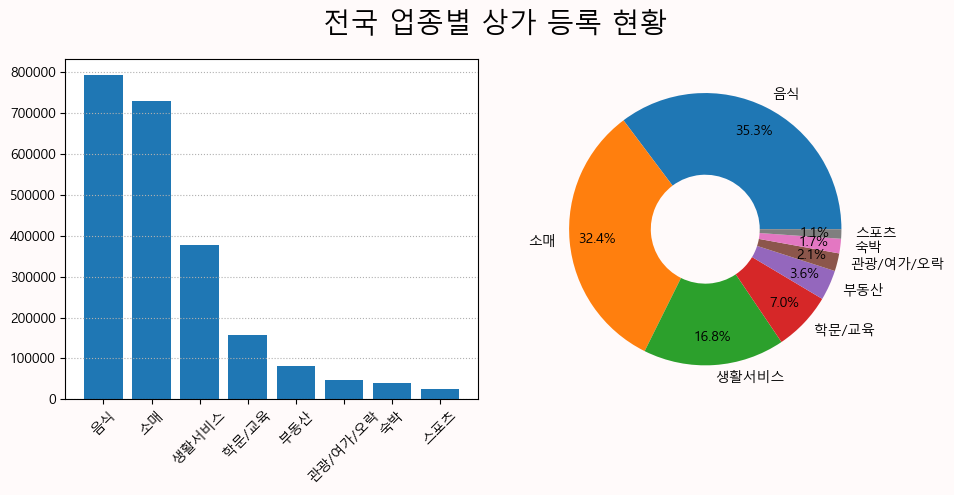

In [159]:
fig = plt.figure(figsize=(10,5), facecolor='snow')
# 막대그래프
plt.subplot(121)
plt.bar(df_store_class1.index, df_store_class1.values)
plt.xticks(rotation=45)
plt.grid(axis='y',ls=':')

# 파이그래프 
plt.subplot(122)
plt.pie(df_store_class1.values, labels=df_store_class1.index, autopct='%.1f%%', pctdistance=0.8,
       wedgeprops={'width':0.6})

fig.suptitle('전국 업종별 상가 등록 현황', size=20)
fig.tight_layout()
plt.show()

## 시도별 상가 갯수

In [160]:
df_store_sido = df_store['시도명'].value_counts()
df_store_sido

경기도        516790
서울특별시      325880
경상남도       158901
부산광역시      140029
경상북도       135299
충청남도       115651
전라남도       109831
인천광역시      107679
전라북도       106471
강원도        105273
대구광역시       96784
충청북도        86653
대전광역시       69583
광주광역시       65786
제주특별자치도     47851
울산광역시       45504
세종특별자치시     11973
Name: 시도명, dtype: int64

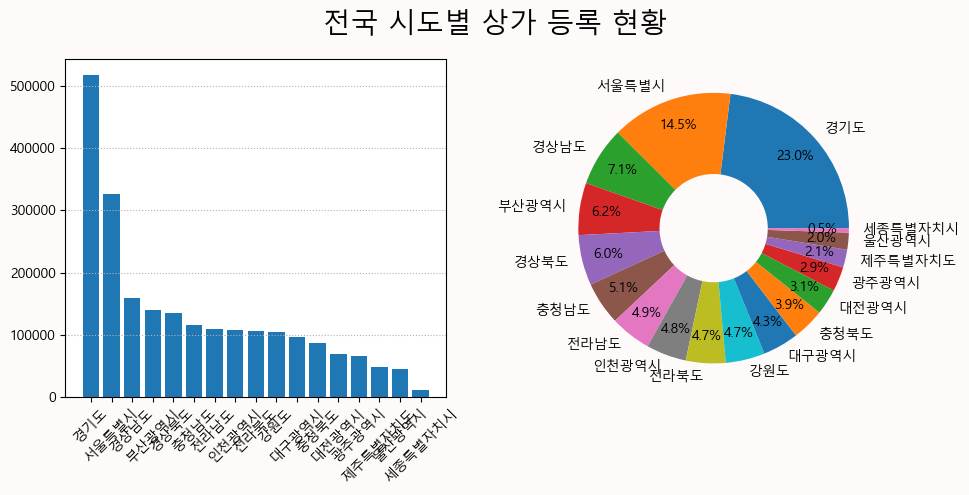

In [162]:
fig = plt.figure(figsize=(10,5), facecolor='snow')

# 막대그래프
plt.subplot(121)
plt.bar(df_store_sido.index, df_store_sido.values)
plt.xticks(rotation=45)
plt.grid(axis='y',ls=':')

# 파이그래프
plt.subplot(122)
plt.pie(df_store_sido.values, labels=df_store_sido.index, autopct='%.1f%%', pctdistance=0.8,
       wedgeprops={'width':0.6})

fig.suptitle('전국 시도별 상가 등록 현황', size=20)
fig.tight_layout()
plt.show()

## 시도별 업종대분류별 상가현황

In [163]:
df_store_pivot = df_store.pivot_table(index='상권업종대분류명', columns='시도명', values='상호명', aggfunc='count')

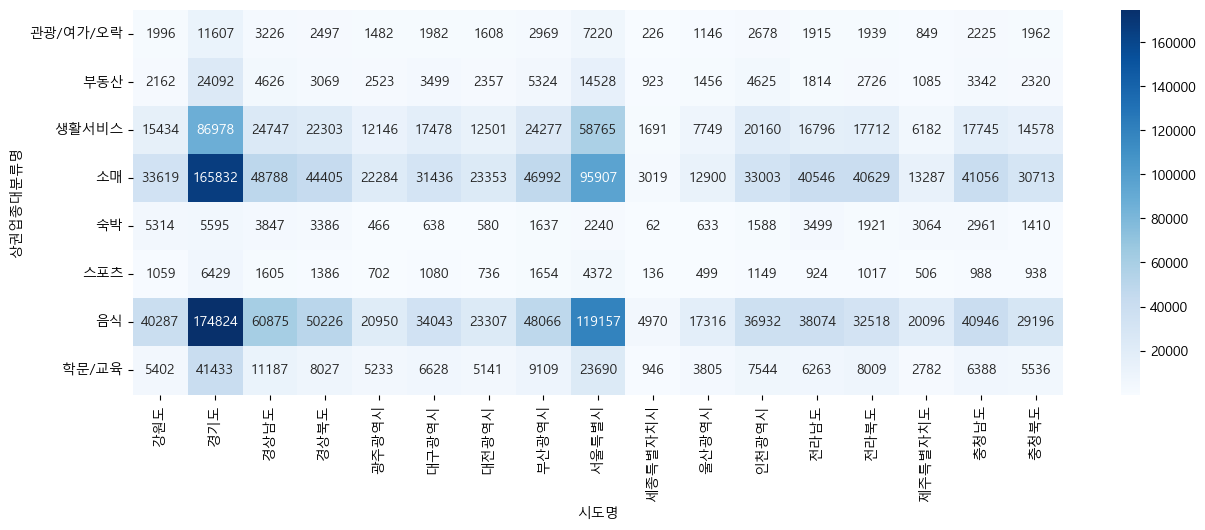

In [164]:
plt.figure(figsize=(15,5))
sns.heatmap(df_store_pivot, cmap='Blues', annot=True, fmt='d')
plt.show()

## 서울시 상가 현황

In [165]:
df_store_seoul = df_store[df_store['시도명']=='서울특별시'].copy()
df_store_seoul.head(3)

상호명 상권업종대분류명   상권업종중분류명  상권업종소분류명    시도명  시군구명  행정동명    법정동명  \
1288445  BYC상신점       소매       의복의류  셔츠/내의/속옷  서울특별시   송파구  거여2동     거여동   
1288446   제중건강원       소매    건강/미용식품       건강원  서울특별시  영등포구  영등포동  영등포동5가   
1288447   민속악기사       소매  취미/오락관련소매      악기판매  서울특별시   성동구   용답동     용답동   

                 경도         위도  
1288445  127.147321  37.493054  
1288446  126.907168  37.520613  
1288447  127.049018  37.566857

In [167]:
df_store_seoul_gu = df_store_seoul['시군구명'].value_counts()
df_store_seoul_gu

강남구     31783
송파구     19278
서초구     19038
중구      16595
강서구     15786
마포구     15132
종로구     14050
강동구     13849
광진구     13166
영등포구    12796
구로구     12406
동대문구    12231
성북구     11920
은평구     11539
관악구     10743
중랑구     10652
양천구     10590
용산구     10567
노원구     10338
성동구      9790
금천구      9407
서대문구     9099
동작구      8877
강북구      8415
도봉구      7833
Name: 시군구명, dtype: int64

### 판다스 함수로 시각화

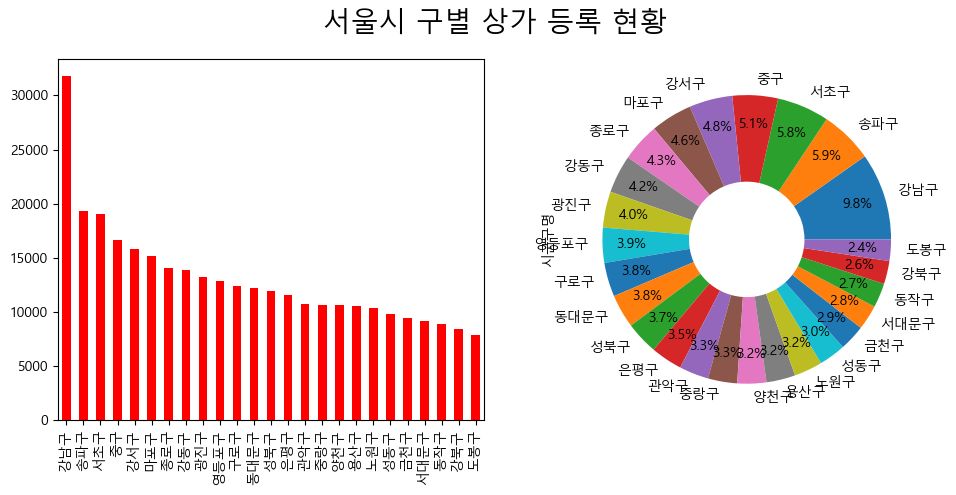

In [181]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
#df_store_seoul_gu.plot(kind='bar')
df_store_seoul_gu.plot.bar(color='r')

plt.subplot(122)
df_store_seoul_gu.plot.pie(autopct='%.1f%%', pctdistance=0.8, wedgeprops={'width':0.6})

fig.suptitle('서울시 구별 상가 등록 현황', size=20)
fig.tight_layout()
plt.show()

## 구별 업종대분류별 상가현황

In [182]:
df_store_seoul_pivot = df_store_seoul.pivot_table(index='상권업종대분류명' , columns='시군구명', values='상호명', aggfunc='count')

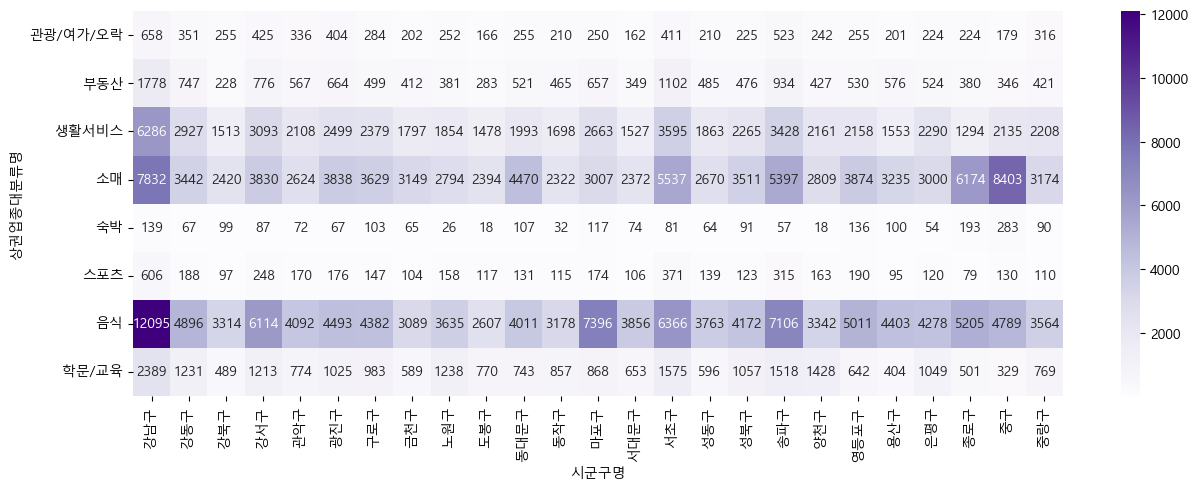

In [183]:
plt.figure(figsize=(15,5))
sns.heatmap(df_store_seoul_pivot, cmap='Purples', annot=True, fmt='d')
plt.show()

## 소분류-구별 상가 등록 수 시각화

In [209]:
# 구별 위도, 경도 평균값
df_store_seoul_location = df_store_seoul[['시군구명','경도','위도']].groupby('시군구명').mean()
df_store_seoul_location

경도         위도
시군구명                       
강남구   127.046516  37.505559
강동구   127.139304  37.542769
강북구   127.023701  37.631658
강서구   126.838680  37.553720
관악구   126.938068  37.480156
광진구   127.081656  37.546348
구로구   126.871035  37.495006
금천구   126.897352  37.464411
노원구   127.068221  37.646709
도봉구   127.037631  37.657279
동대문구  127.053797  37.579095
동작구   126.949721  37.498049
마포구   126.924215  37.554848
서대문구  126.938390  37.572018
서초구   127.012718  37.490568
성동구   127.041079  37.553127
성북구   127.027441  37.601655
송파구   127.114932  37.502032
양천구   126.858392  37.527969
영등포구  126.906492  37.517797
용산구   126.979110  37.535308
은평구   126.919514  37.609427
종로구   126.991246  37.576429
중구    126.996447  37.563221
중랑구   127.087664  37.596236

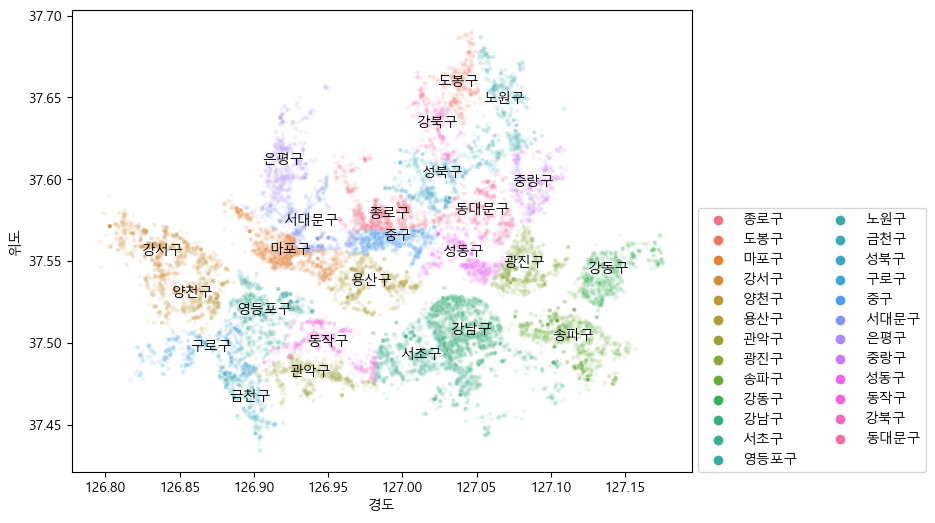

In [211]:
plt.figure(figsize=(8,6))
df_store_seoul_class3 = df_store_seoul[df_store_seoul['상권업종소분류명']=='커피전문점/카페/다방']
df_store_seoul_class3

sns.scatterplot(data=df_store_seoul_class3, x='경도', y='위도', hue='시군구명', marker='.', alpha=0.1)
plt.legend(ncol=2, loc=(1.01,0))

for i in range(len(df_store_seoul_location)):
    x = df_store_seoul_location.iloc[i,0]
    y = df_store_seoul_location.iloc[i,1]
    text=df_store_seoul_location.index[i]
    plt.text(x,y,text, ha='center')

plt.show()

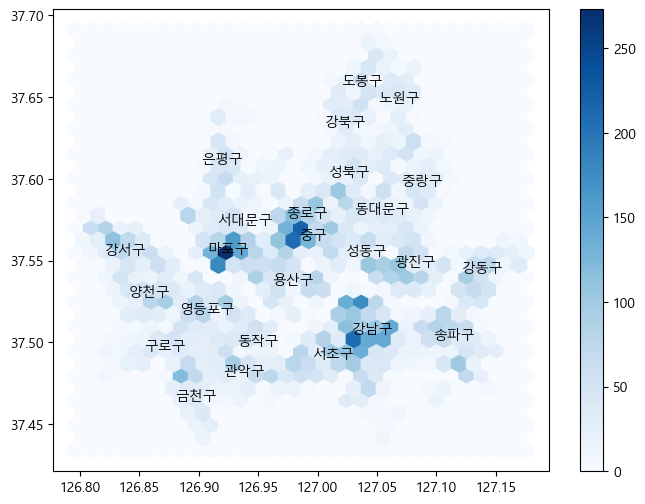

In [214]:
plt.figure(figsize=(8,6))
df_store_seoul_class3 = df_store_seoul[df_store_seoul['상권업종소분류명']=='커피전문점/카페/다방']
plt.hexbin(df_store_seoul_class3['경도'],df_store_seoul_class3['위도'], cmap='Blues', gridsize=30)
plt.colorbar()

for i in range(len(df_store_seoul_location)):
    x = df_store_seoul_location.iloc[i,0]
    y = df_store_seoul_location.iloc[i,1]
    text=df_store_seoul_location.index[i]
    plt.text(x,y,text, ha='center')
    
plt.show()

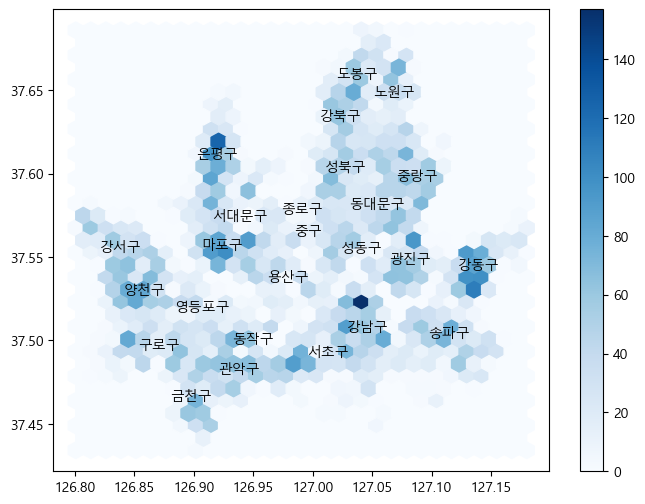

In [216]:
plt.figure(figsize=(8,6))
df_store_seoul_class3 = df_store_seoul[df_store_seoul['상권업종소분류명']=='여성미용실']
plt.hexbin(df_store_seoul_class3['경도'],df_store_seoul_class3['위도'], cmap='Blues', gridsize=30)
plt.colorbar()

for i in range(len(df_store_seoul_location)):
    x = df_store_seoul_location.iloc[i,0]
    y = df_store_seoul_location.iloc[i,1]
    text=df_store_seoul_location.index[i]
    plt.text(x,y,text, ha='center')
    
plt.show()

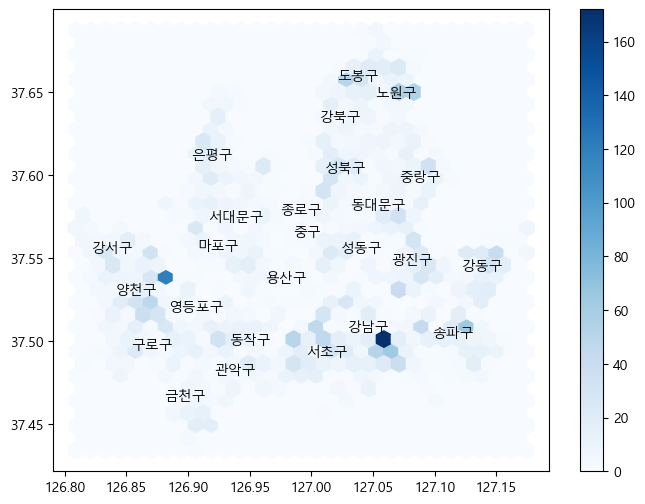

In [217]:
plt.figure(figsize=(8,6))
df_store_seoul_class3 = df_store_seoul[df_store_seoul['상권업종소분류명']=='학원-입시']
plt.hexbin(df_store_seoul_class3['경도'],df_store_seoul_class3['위도'], cmap='Blues', gridsize=30)
plt.colorbar()

for i in range(len(df_store_seoul_location)):
    x = df_store_seoul_location.iloc[i,0]
    y = df_store_seoul_location.iloc[i,1]
    text=df_store_seoul_location.index[i]
    plt.text(x,y,text, ha='center')
    
plt.show()

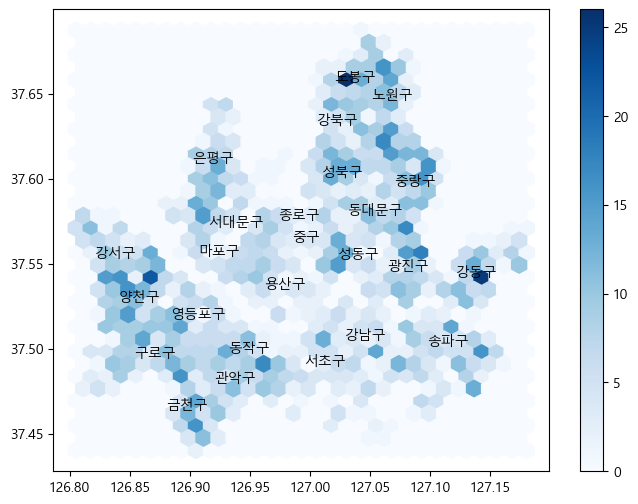

In [219]:
plt.figure(figsize=(8,6))
df_store_seoul_class3 = df_store_seoul[df_store_seoul['상권업종소분류명']=='어린이집']
plt.hexbin(df_store_seoul_class3['경도'],df_store_seoul_class3['위도'], cmap='Blues', gridsize=30)
plt.colorbar()

for i in range(len(df_store_seoul_location)):
    x = df_store_seoul_location.iloc[i,0]
    y = df_store_seoul_location.iloc[i,1]
    text=df_store_seoul_location.index[i]
    plt.text(x,y,text, ha='center')
    
plt.show()